# TP1-DATA MINING

## Description des donnees

### Contexte general
Le Trouble du Spectre de l'Autisme (TSA) est une condition de neurodéveloppement associée à des coûts de santé significatifs, et un diagnostic précoce peut considérablement les réduire. Malheureusement, les délais d'attente pour un diagnostic du TSA sont longs et les procédures ne sont pas rentables. L'impact économique de l'autisme et l'augmentation du nombre de cas de TSA dans le monde révèlent un besoin urgent de développer des méthodes de dépistage facilement mises en œuvre et efficaces. Par conséquent, un dépistage du TSA rapide et accessible est imminent pour aider les professionnels de la santé et informer les individus s'ils doivent rechercher un diagnostic clinique formel.

La croissance rapide du nombre de cas de TSA dans le monde nécessite des ensembles de données liés aux traits de comportement. Cependant, de tels ensembles de données sont rares, ce qui rend difficile la réalisation d'analyses approfondies pour améliorer l'efficacité, la sensibilité, la spécificité et l'exactitude prédictive du processus de dépistage du TSA. Actuellement, très peu d'ensembles de données sur l'autisme liés à la clinique ou au dépistage sont disponibles, et la plupart d'entre eux ont une nature génétique. L'ensemble de donnees que nous allons exploiter comprend 20 caractéristiques utiles pour déterminer les traits autistiques influents et améliorer la classification des cas de TSA. Dans cet ensemble de données, nous enregistrons dix caractéristiques comportementales (AQ-10-Adult) ainsi que dix caractéristiques individuelles qui se sont révélées efficaces dans la détection des cas de TSA par rapport aux témoins dans le domaine des sciences du comportement.

In [178]:
# Importation
from sklearn import metrics, neighbors 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score 
from sklearn.linear_model import LogisticRegression

### Description des colonnes

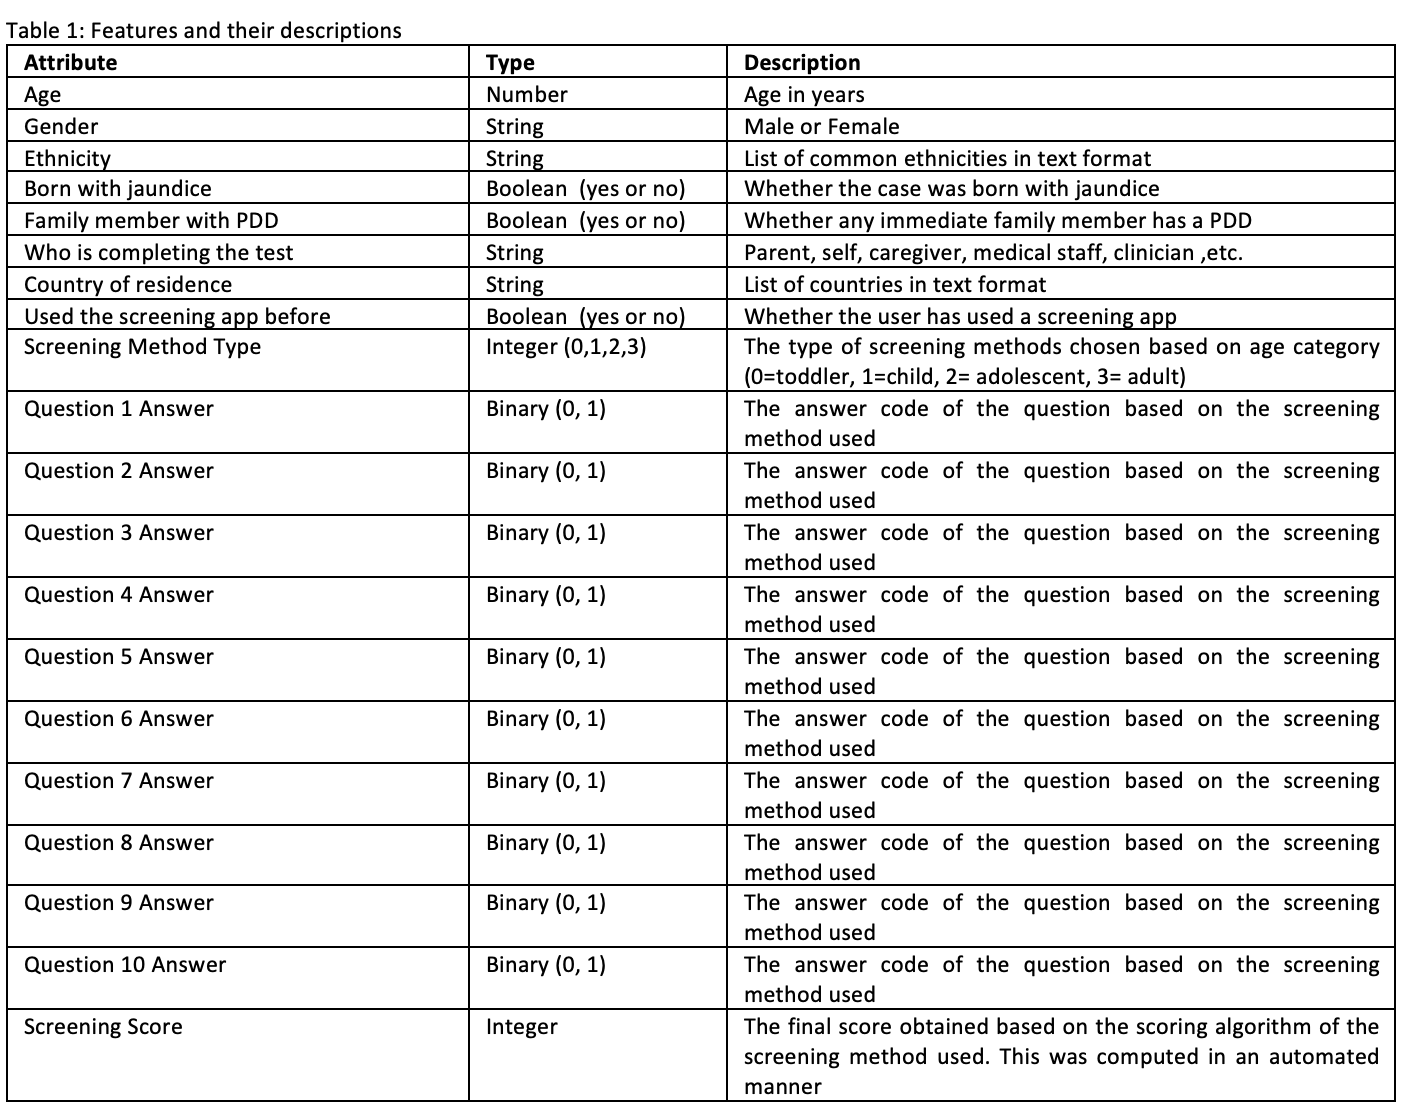

In [110]:
from IPython.display import Image
Image(filename='img/Capture d’écran 2023-12-17 à 21.19.22.png')

Ce tableau contient les vingt (20) variables qui constituent notre dataset. Ils peuvent se regrouper dans deux categories:
- les informations personnelles sur le patient: age, sexe, country of residence, ethnicity,born with jaundice, family member with PDD
- les informations sur les tests: Q1 Answer->Q10 Answer, who is completing the test, screening method type, screening score

### Data loading

In [111]:
import pandas as pd

datas = pd.read_csv("../datas/autism_screening.csv")

In [112]:
datas.shape

(704, 21)

In [113]:
datas.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [114]:
datas.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [115]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

### Mesures des tendances centrales

##### Numerical columns

In [116]:
datas[['age', 'result']].describe()

,age,result
count,702.000000,704.000000
mean,29.698006,4.875000
std,16.507465,2.501493
min,17.000000,0.000000
25%,21.000000,3.000000
50%,27.000000,4.000000
75%,35.000000,7.000000
max,383.000000,10.000000


Text(0.5, 1.0, "Distribution de la densite de l'age")

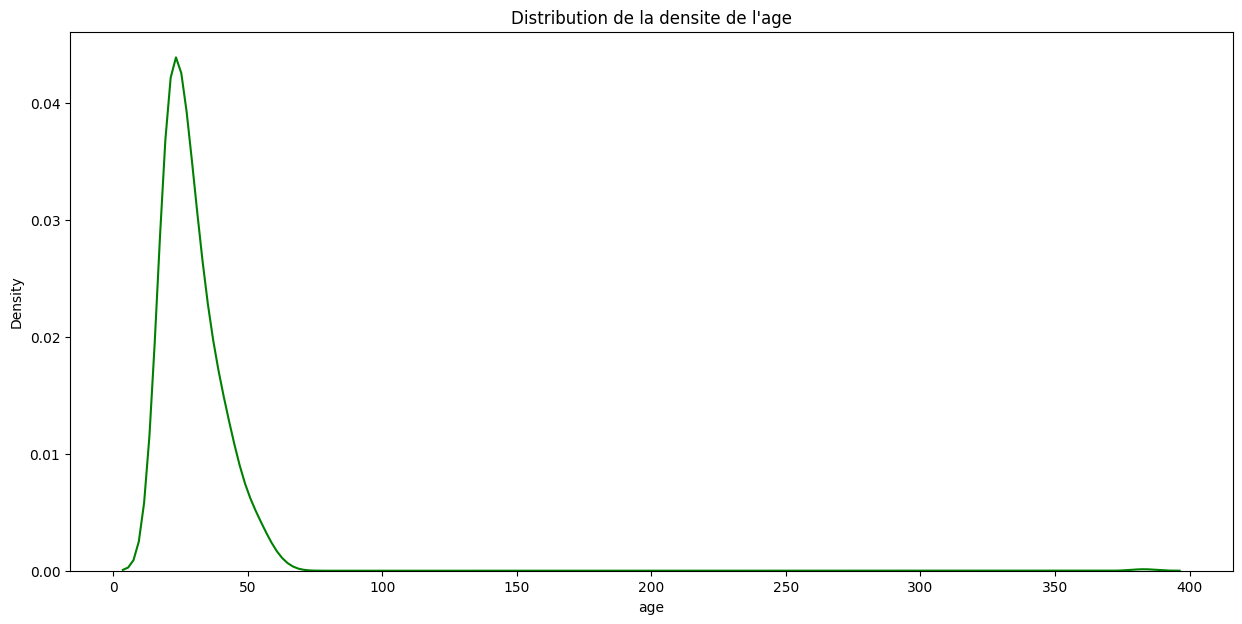

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
sns.kdeplot(datas['age'], color='green')
plt.title("Distribution de la densite de l'age")

La nous voyons que l'age maximal a la valeur de 383, on va utiliser la "trimmed mean" pour calculer une moyenne coherente de l'age.

In [118]:
from scipy.stats import trim_mean


moyenne_age = trim_mean(datas['age'], proportiontocut=0.2)

print(moyenne_age)

27.36320754716981


Text(0.5, 1.0, 'Distribution de la densite de resultat')

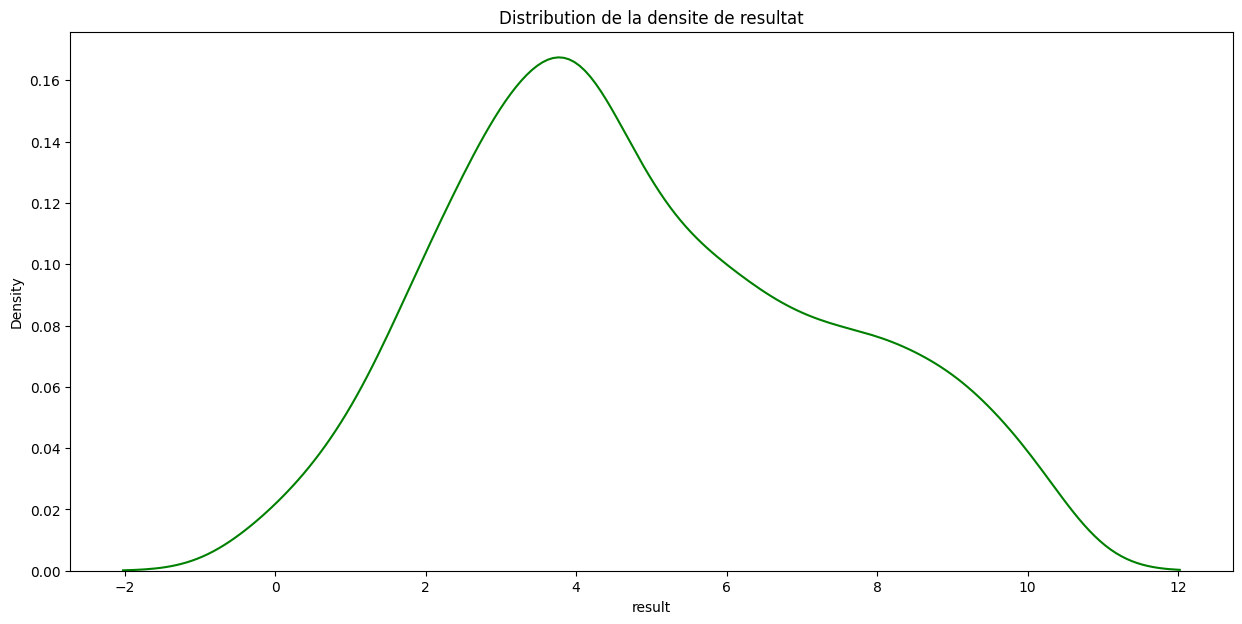

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
sns.kdeplot(datas['result'], color='green')
plt.title("Distribution de la densite de resultat")

#### Binary Columns

In [120]:
datas[['A1_Score', 'A2_Score','A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']].mode()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,1,0,0,0,0,0,0,1,0,1


In [121]:
binary_columns = ['A1_Score', 'A2_Score','A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

A1_Score
1    508
0    196
Name: count, dtype: int64


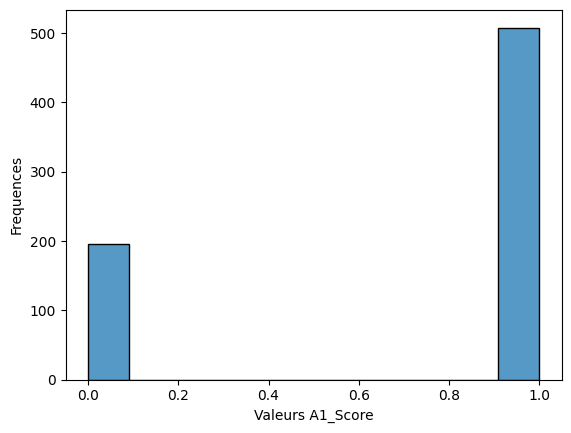

A2_Score
0    385
1    319
Name: count, dtype: int64


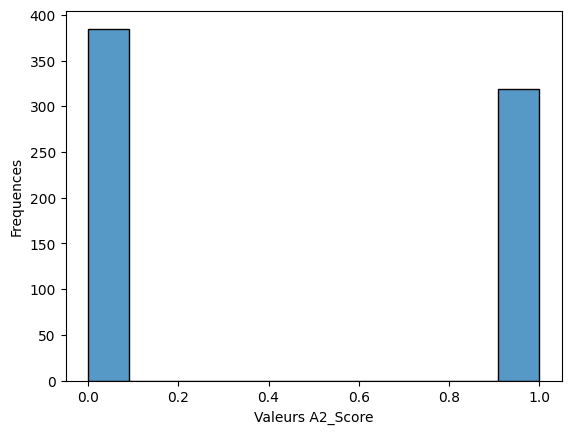

A3_Score
0    382
1    322
Name: count, dtype: int64


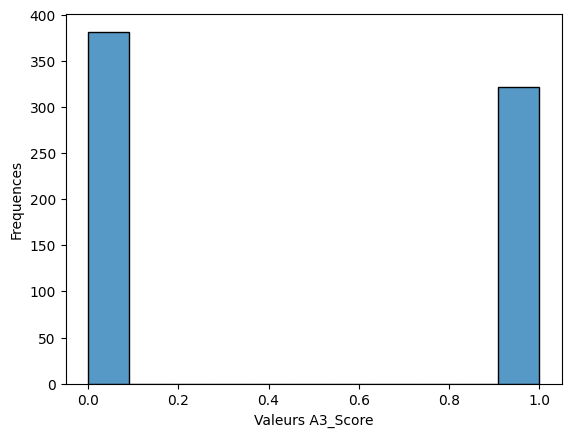

A4_Score
0    355
1    349
Name: count, dtype: int64


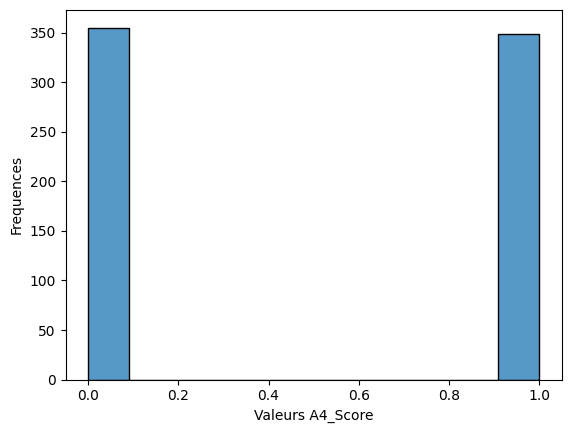

A5_Score
0    353
1    351
Name: count, dtype: int64


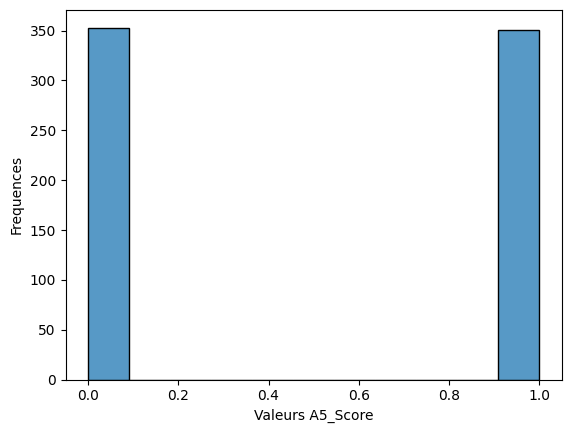

A6_Score
0    504
1    200
Name: count, dtype: int64


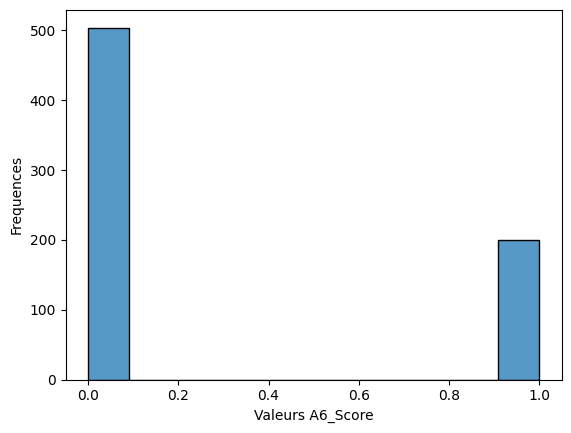

A7_Score
0    410
1    294
Name: count, dtype: int64


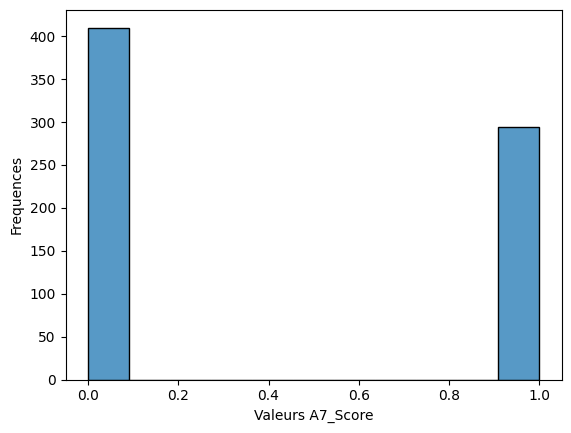

A8_Score
1    457
0    247
Name: count, dtype: int64


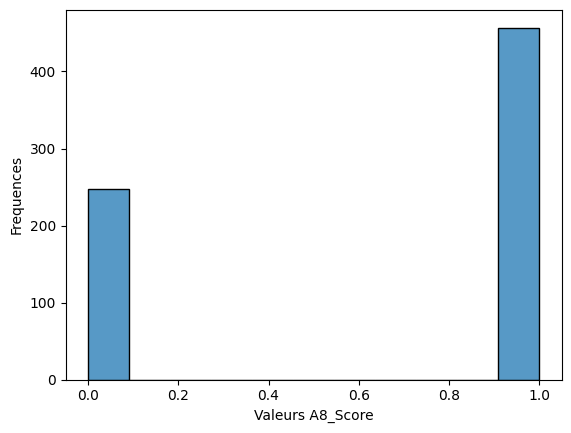

A9_Score
0    476
1    228
Name: count, dtype: int64


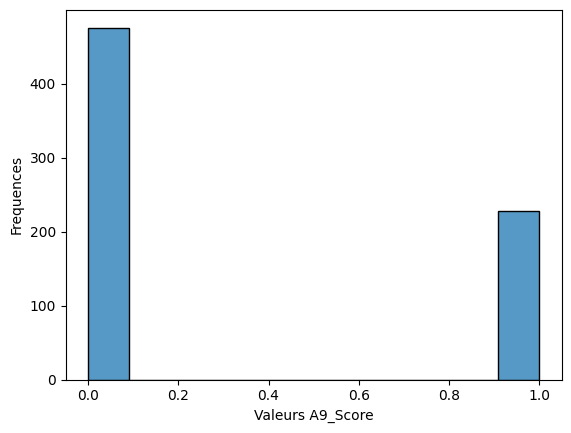

A10_Score
1    404
0    300
Name: count, dtype: int64


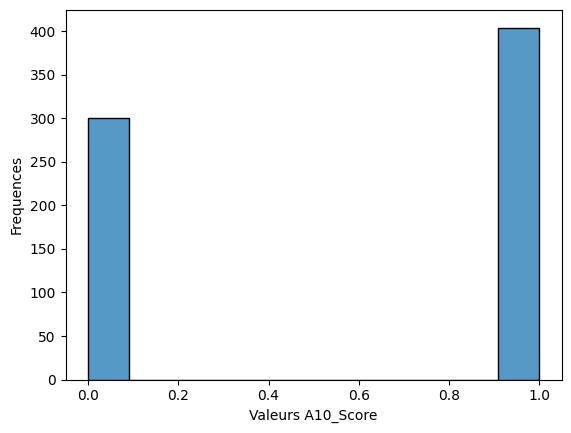

In [122]:
import matplotlib.pyplot as plt

for column in binary_columns:
    print(datas[column].value_counts())
    sns.histplot(datas[column])
    plt.xlabel(f"Valeurs {column}")
    plt.ylabel("Frequences")
    plt.show()

In [123]:
datas.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


#### Boolean columns


jundice
no     635
yes     69
Name: count, dtype: int64


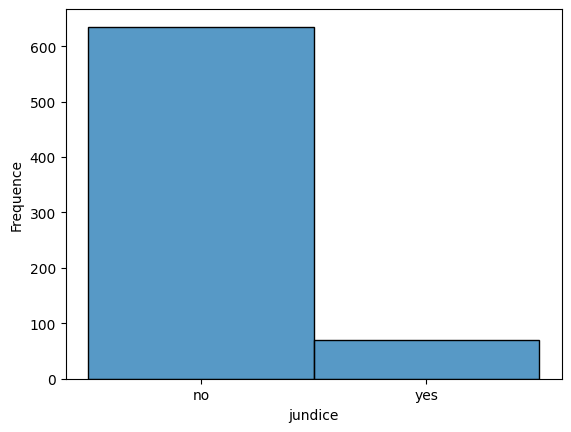

used_app_before
no     692
yes     12
Name: count, dtype: int64


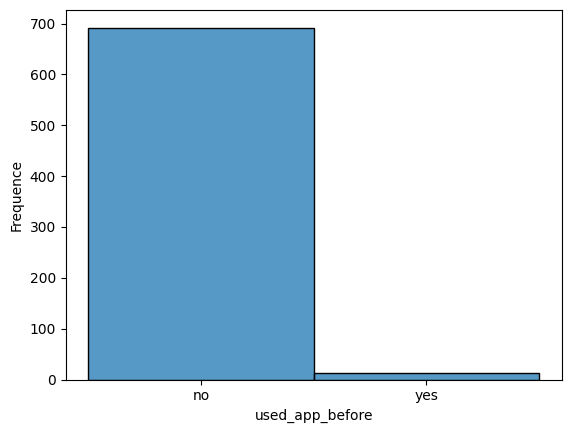

Class/ASD
NO     515
YES    189
Name: count, dtype: int64


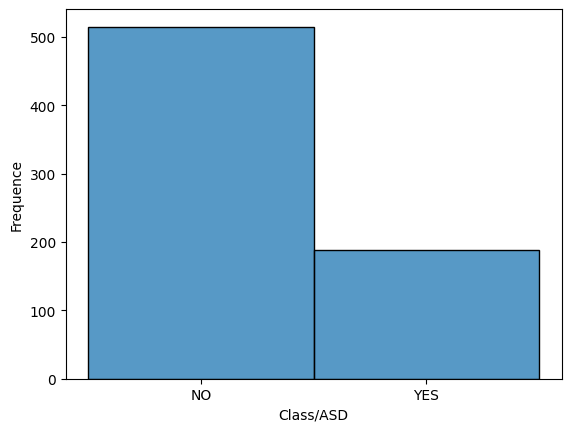

In [124]:
boolean_columns = ['jundice', 'used_app_before','Class/ASD']

for column in boolean_columns:
    print(datas[column].value_counts())
    sns.histplot(datas[column])
    plt.xlabel(column)
    plt.ylabel("Frequence")
    plt.show()

#### Categrorical columns

In [125]:
categorical_columns = ["contry_of_res", "relation", "gender", "age_desc", "ethnicity"]

datas[categorical_columns].mode()

,contry_of_res,relation,gender,age_desc,ethnicity
0,United States,Self,m,18 and more,White-European


['United States' 'Brazil' 'Spain' 'Egypt' 'New Zealand' 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland' 'United Arab Emirates'
 'Afghanistan' 'Lebanon' 'United Kingdom' 'South Africa' 'Italy'
 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China' 'Australia' 'Canada'
 'Saudi Arabia' 'Netherlands' 'Romania' 'Sweden' 'Tonga' 'Oman' 'India'
 'Philippines' 'Sri Lanka' 'Sierra Leone' 'Ethiopia' 'Viet Nam' 'Iran'
 'Costa Rica' 'Germany' 'Mexico' 'Russia' 'Armenia' 'Iceland' 'Nicaragua'
 'Hong Kong' 'Japan' 'Ukraine' 'Kazakhstan' 'AmericanSamoa' 'Uruguay'
 'Serbia' 'Portugal' 'Malaysia' 'Ecuador' 'Niger' 'Belgium' 'Bolivia'
 'Aruba' 'Finland' 'Turkey' 'Nepal' 'Indonesia' 'Angola' 'Azerbaijan'
 'Iraq' 'Czech Republic' 'Cyprus']


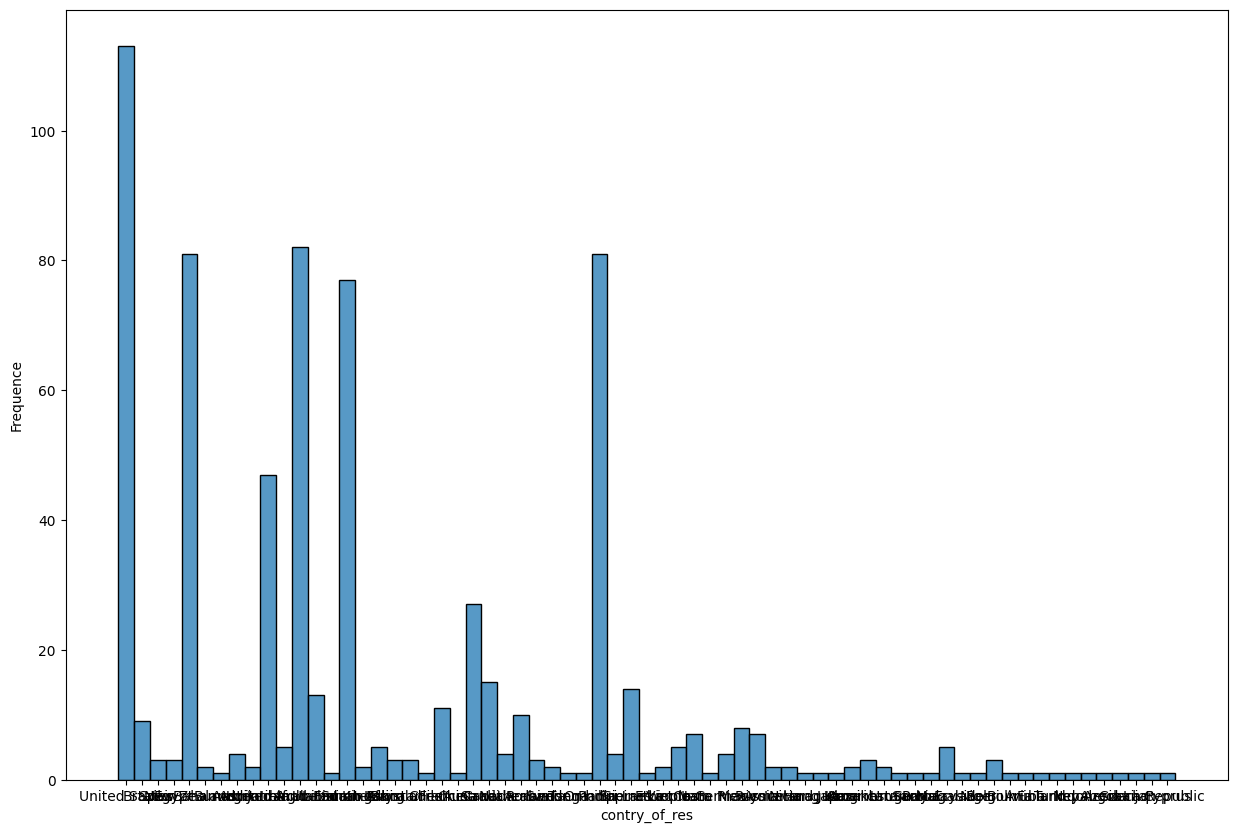

['Self' 'Parent' '?' 'Health care professional' 'Relative' 'Others']


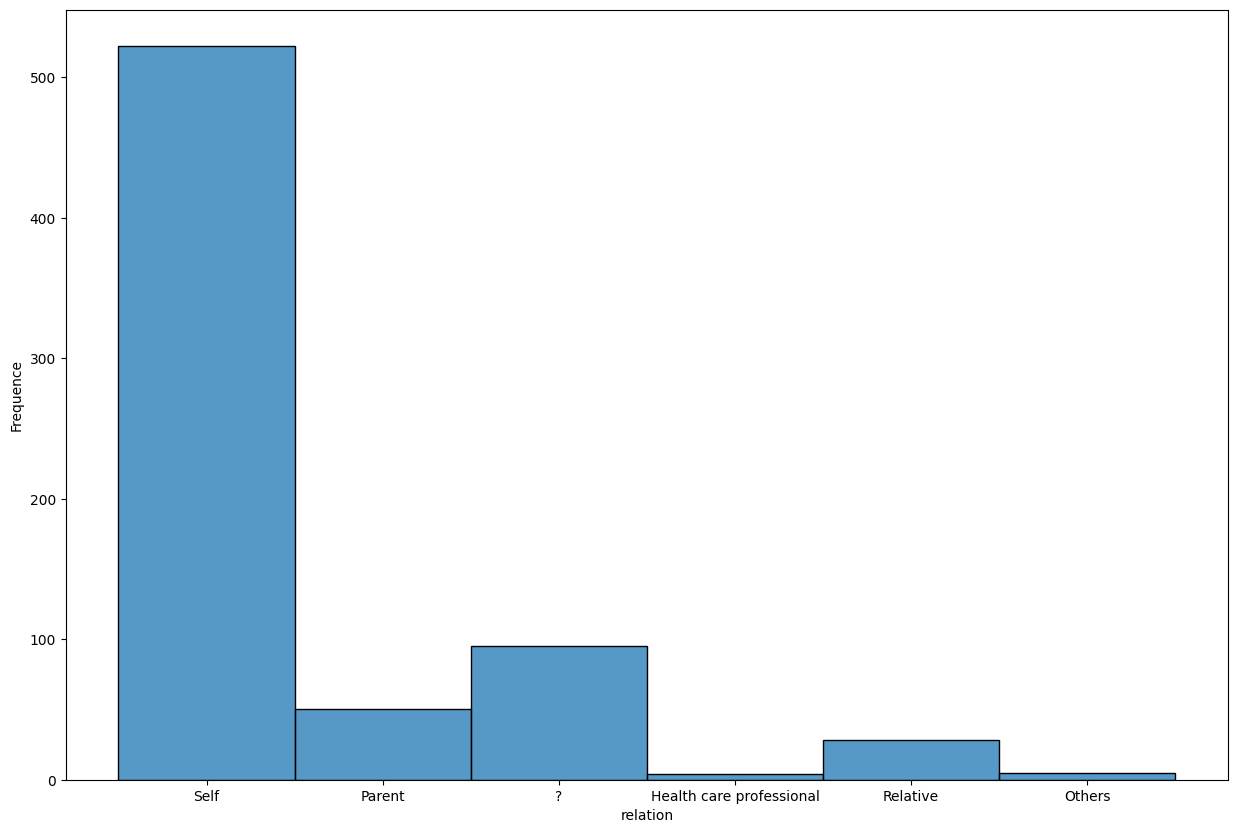

['f' 'm']


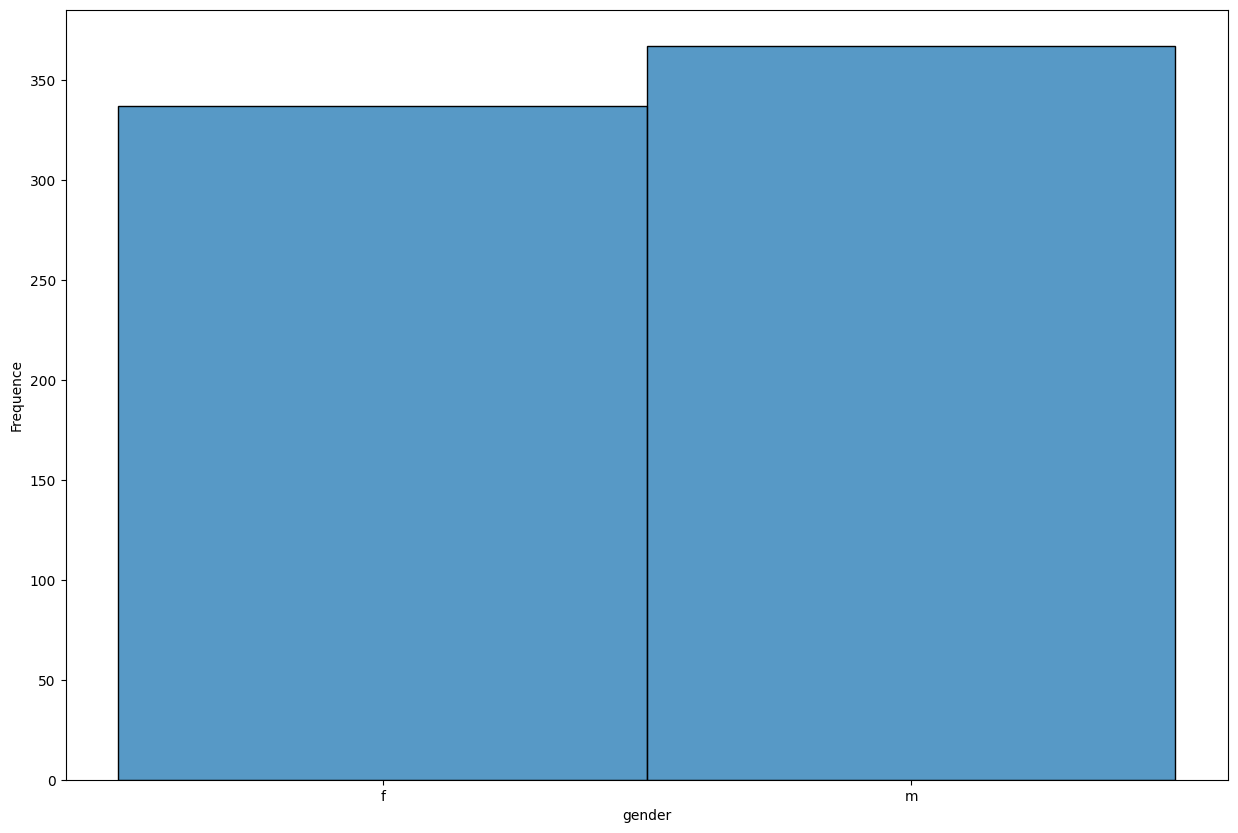

['18 and more']


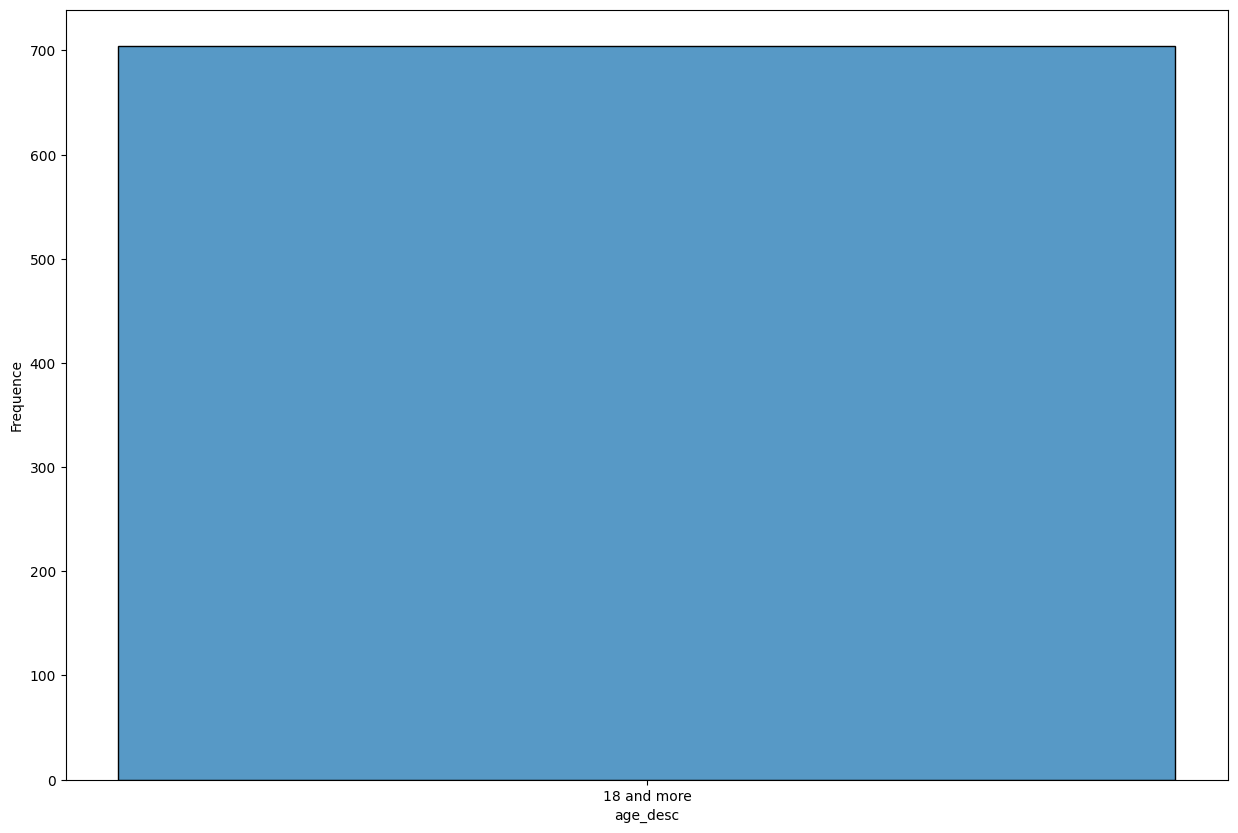

['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']


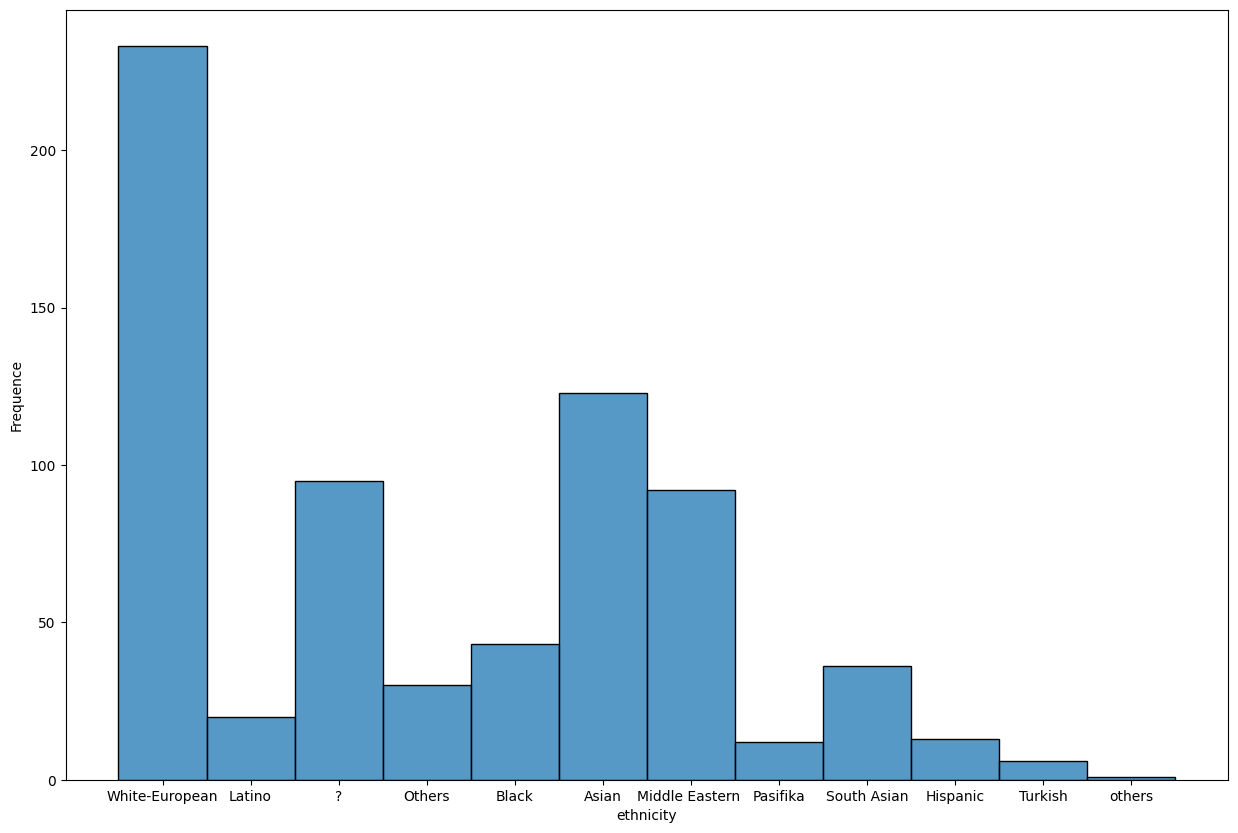

In [126]:
for column in categorical_columns:
    plt.figure(figsize=(15,10))
    print(datas[column].unique())
    sns.histplot(datas[column])
    #sns.boxplot(x=datas[column], y=freq)
    plt.xlabel(column)
    plt.ylabel("Frequence")
    plt.show()

## Visaluation des donnees

#### Visualisation des realations entre les variables

In [127]:
datas['austim'].value_counts()

austim
no     613
yes     91
Name: count, dtype: int64

In [128]:
datas['Class/ASD'].value_counts()

Class/ASD
NO     515
YES    189
Name: count, dtype: int64

Notre variable cible est `Class/ASD`

In [129]:
frequency_table = datas['Class/ASD'].value_counts(normalize=True)
print(frequency_table)

Class/ASD
NO     0.731534
YES    0.268466
Name: proportion, dtype: float64


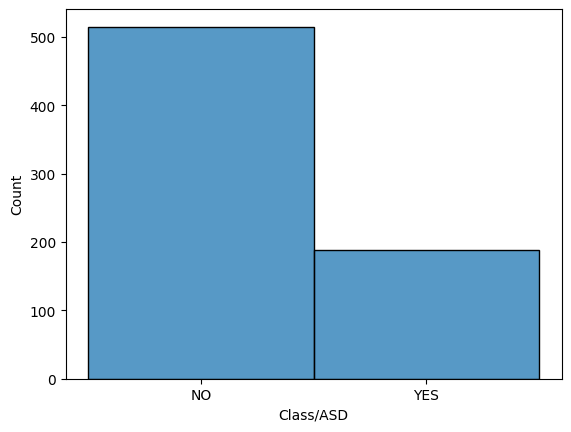

In [130]:
sns.histplot(datas['Class/ASD'])
plt.show()

Nous voyons 

#### Analyse bivariee
Distribution des variables en fonction de la variable cible

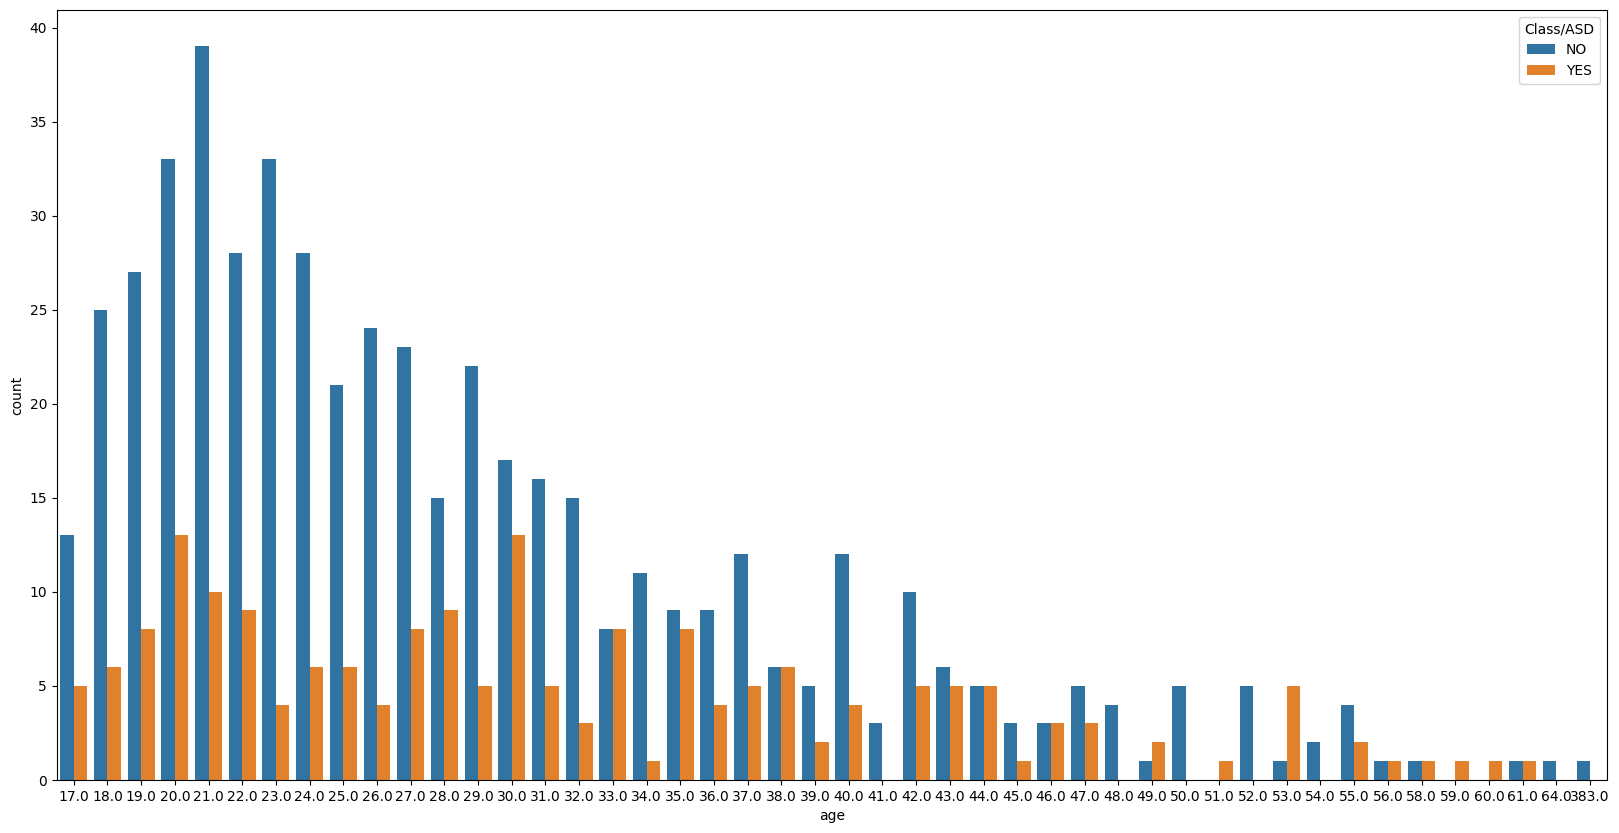

In [131]:
plt.figure(figsize=(20,10))
sns.countplot(x='age', hue='Class/ASD', data=datas)
plt.show()

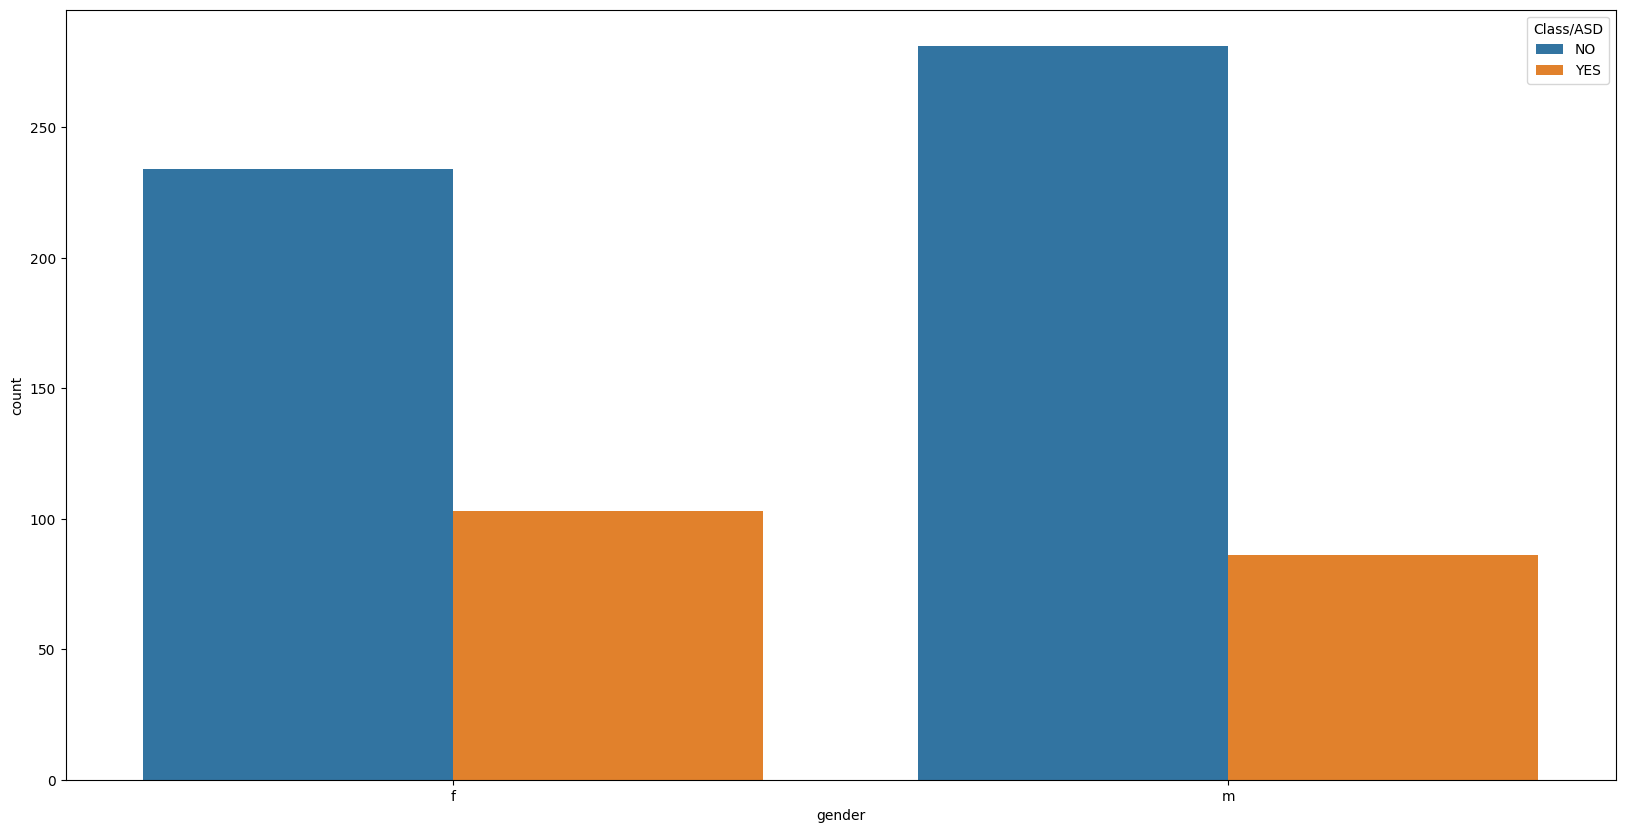

In [132]:
plt.figure(figsize=(20,10))
sns.countplot(x='gender', hue='Class/ASD', data=datas)
plt.show()

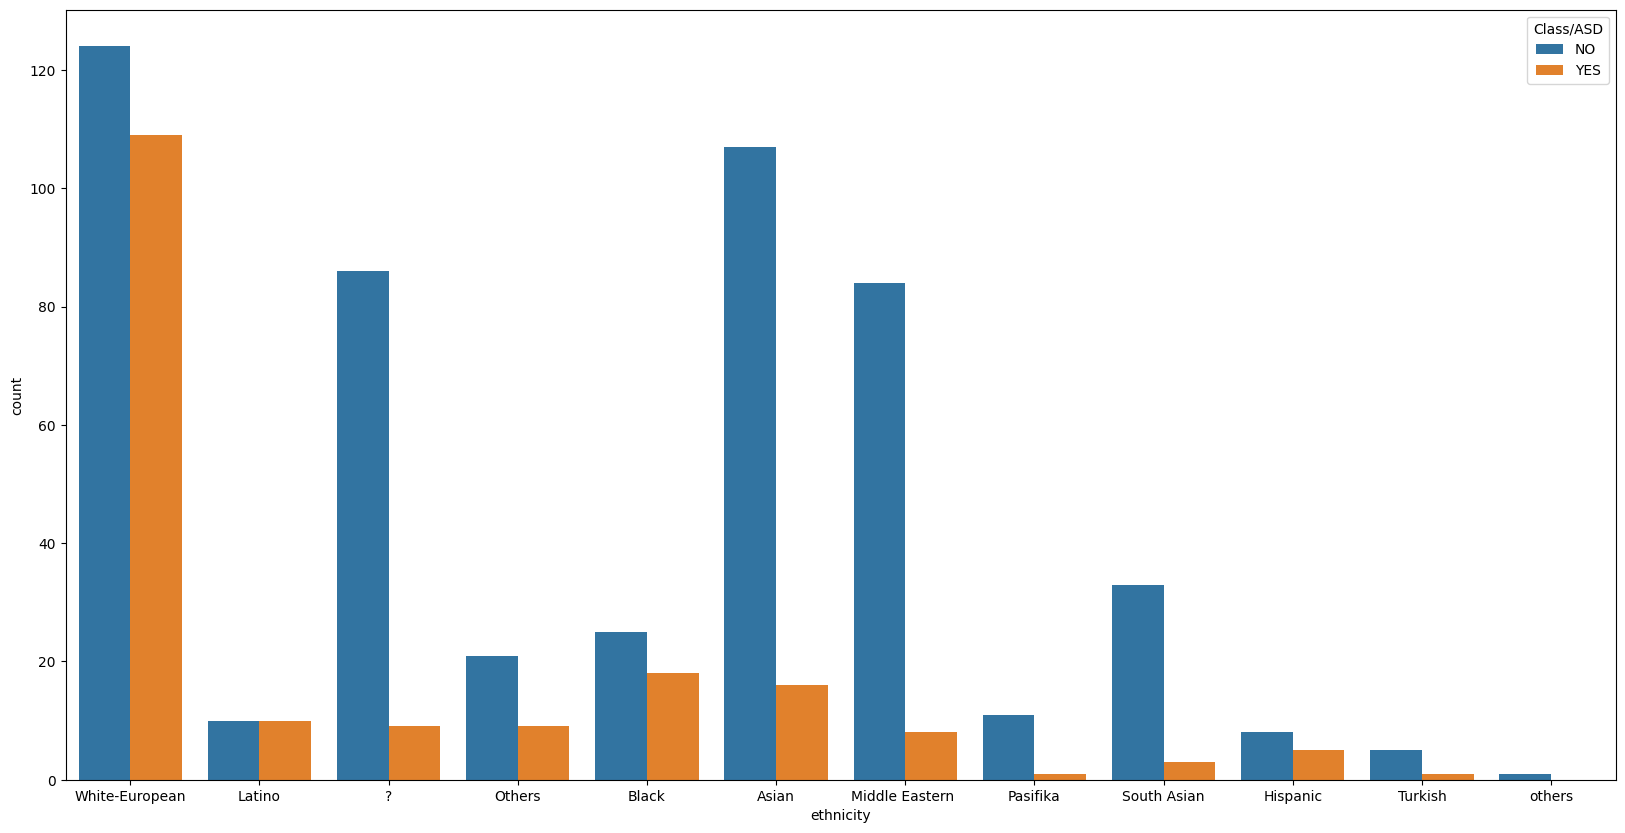

In [133]:
plt.figure(figsize=(20,10))
sns.countplot(x='ethnicity', hue='Class/ASD', data=datas)
plt.show()

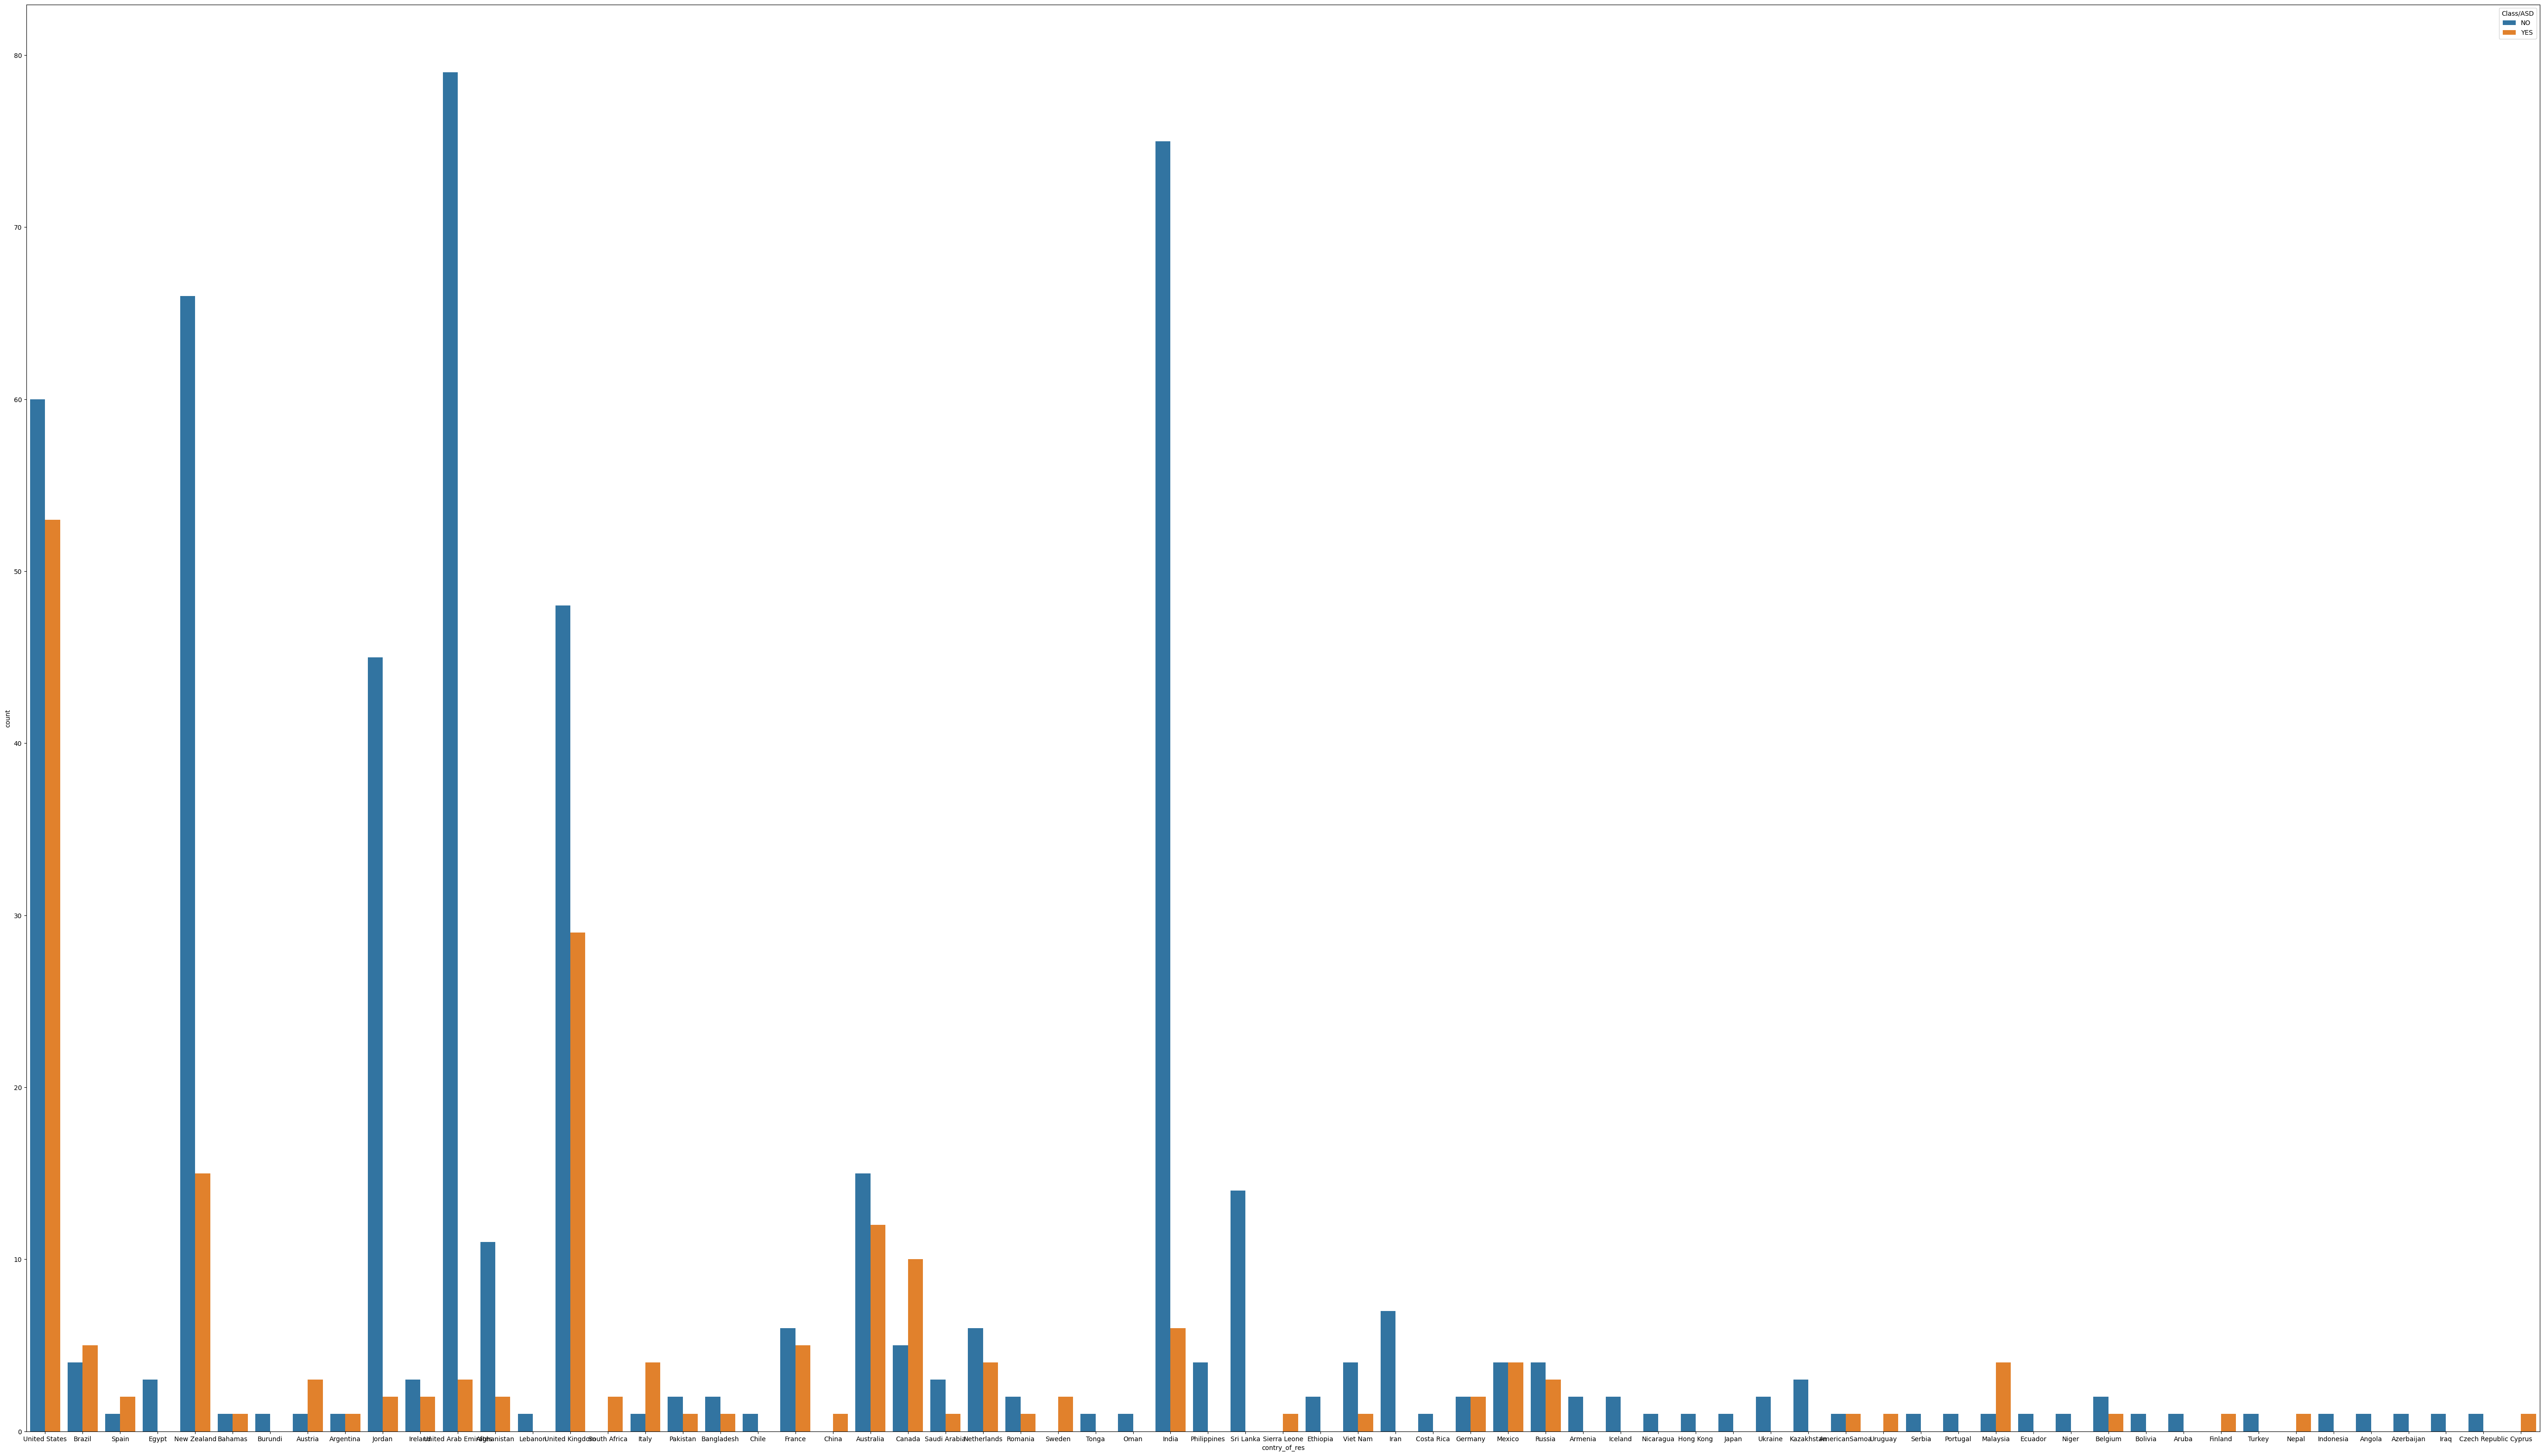

In [134]:
plt.figure(figsize=(70,40))
sns.countplot(x='contry_of_res', hue='Class/ASD', data=datas)
plt.show()

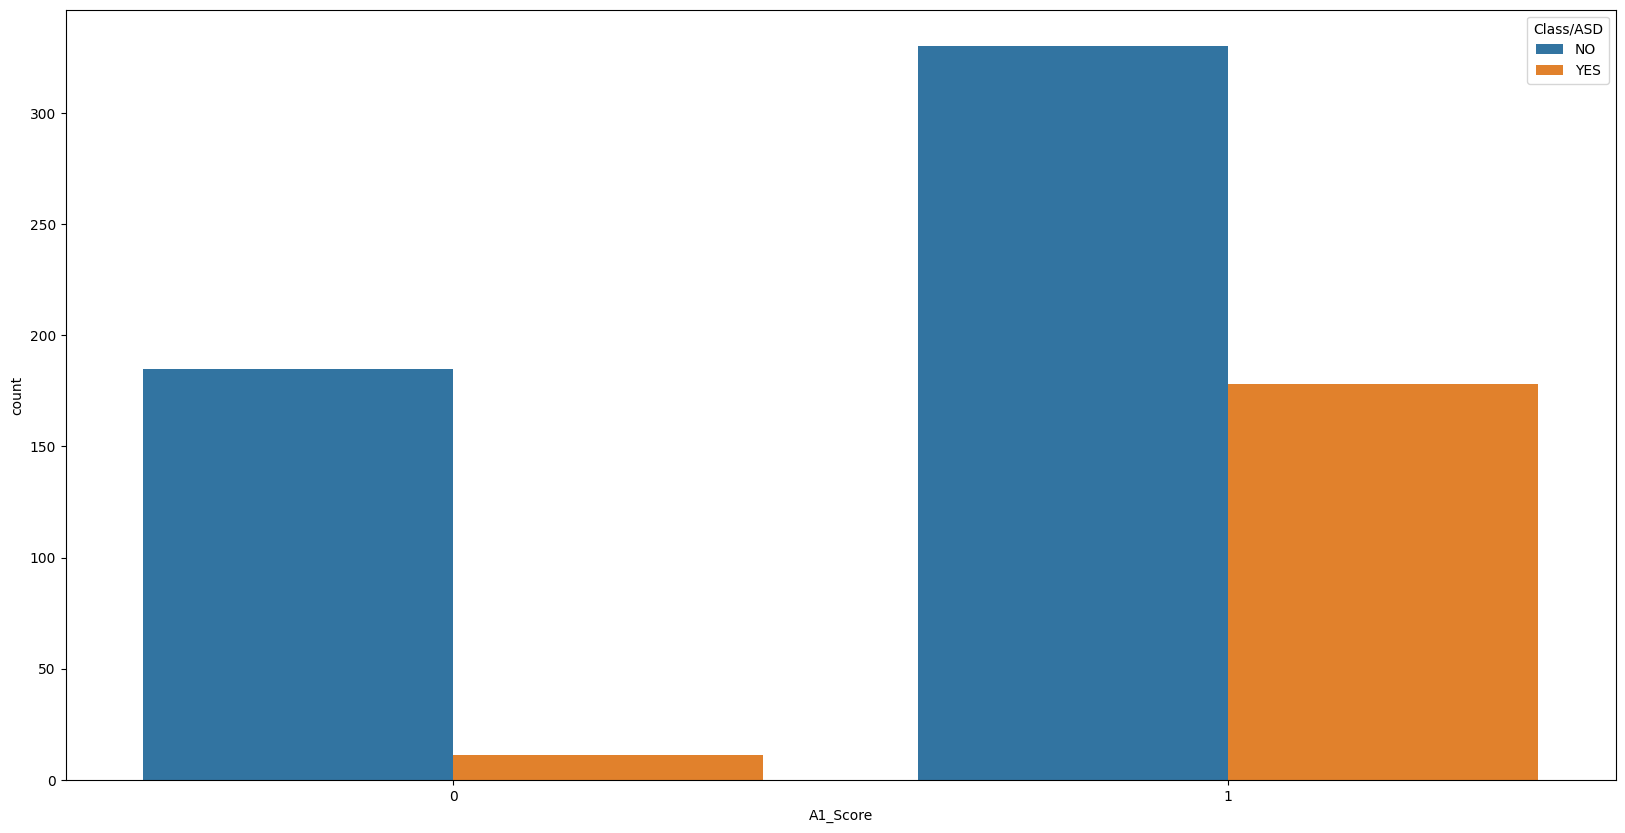

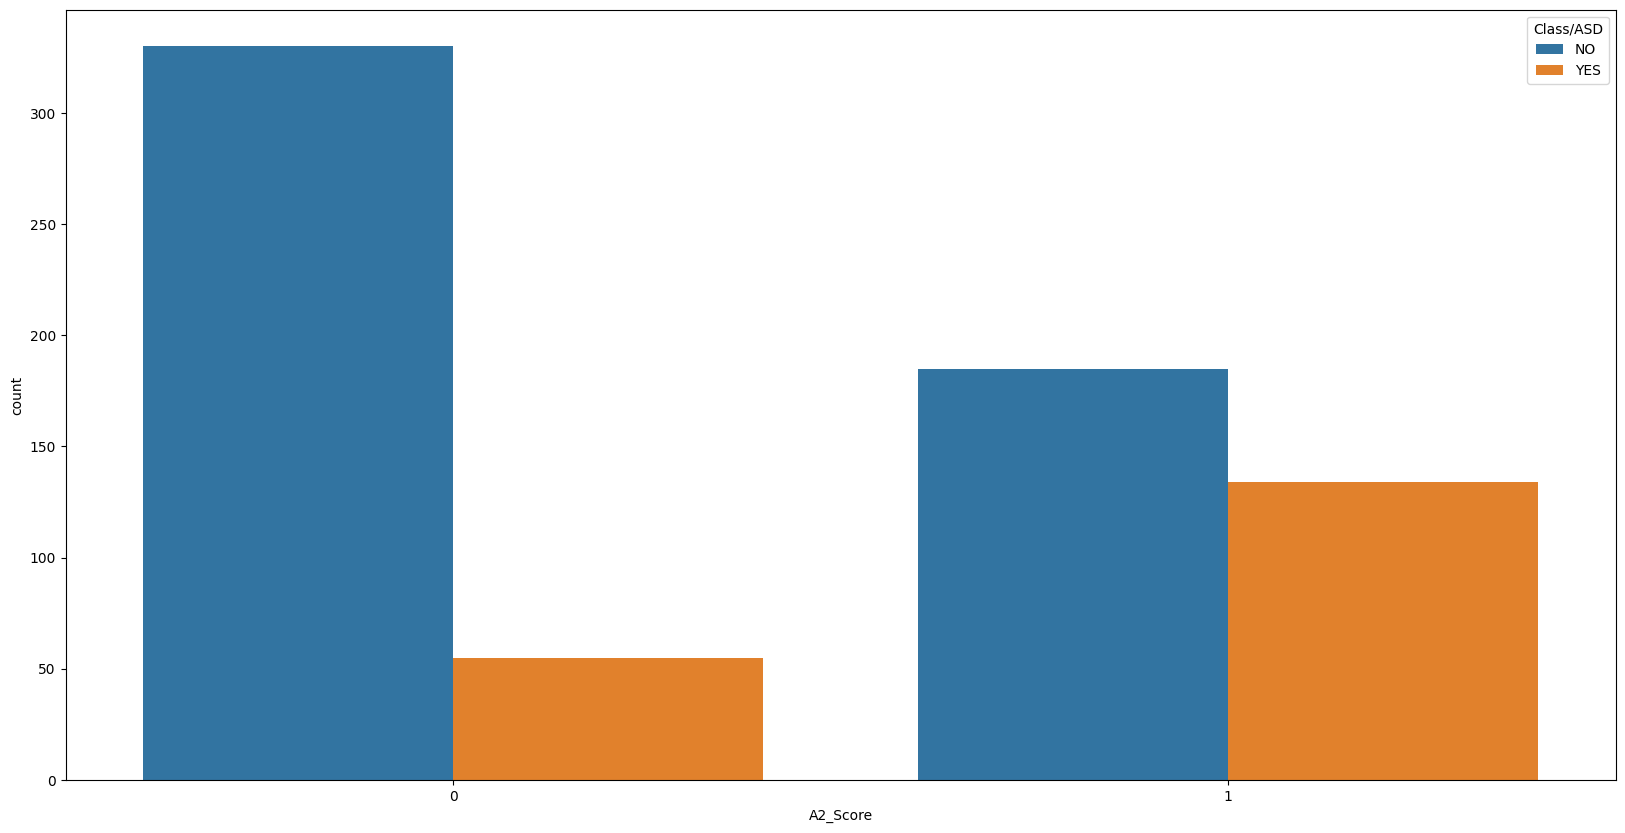

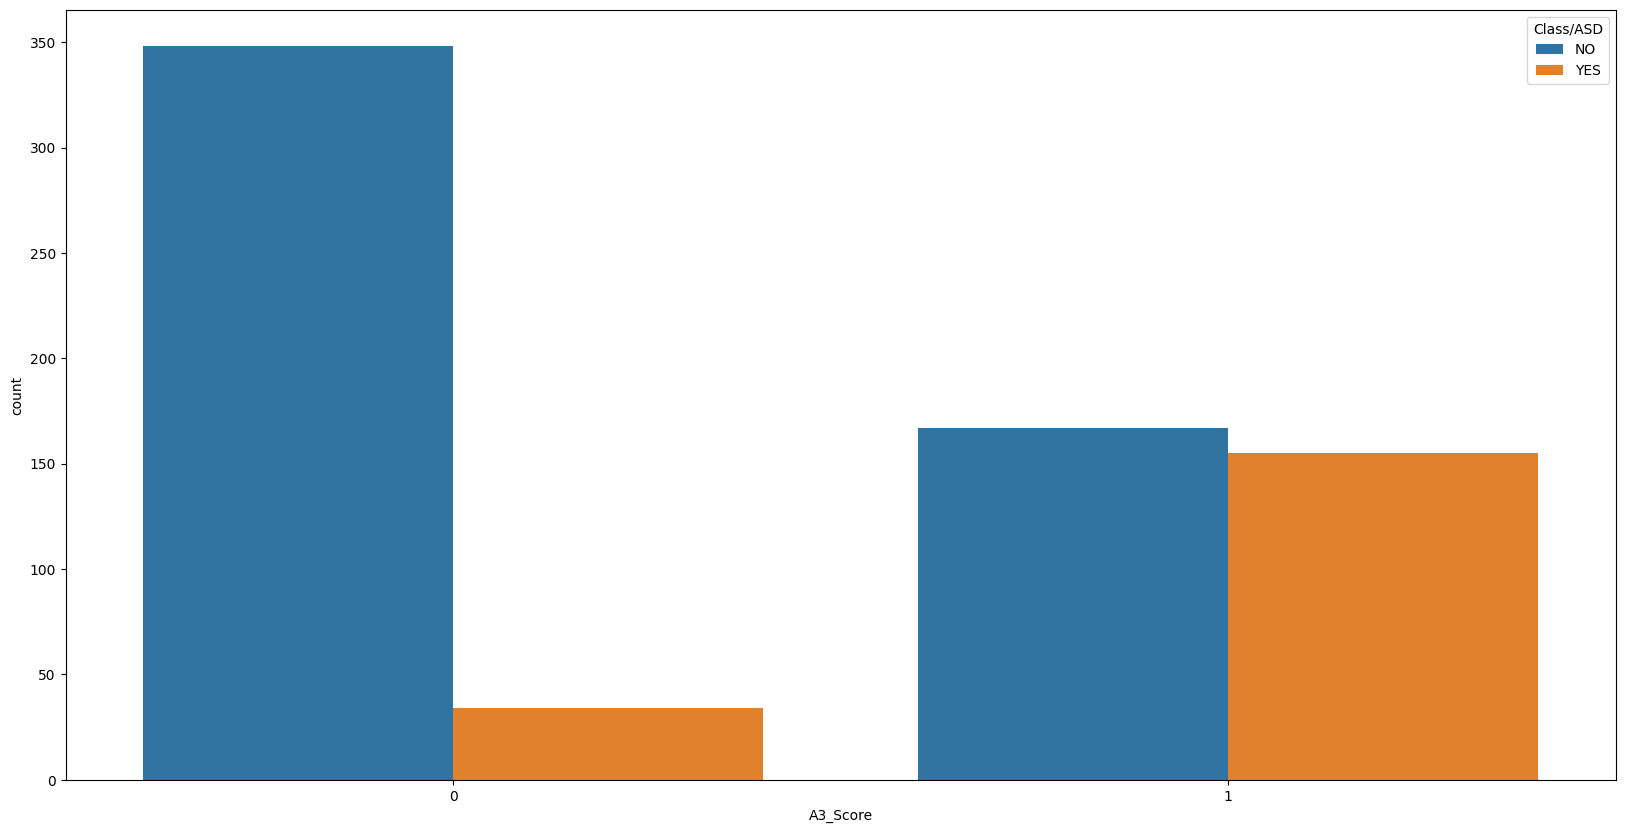

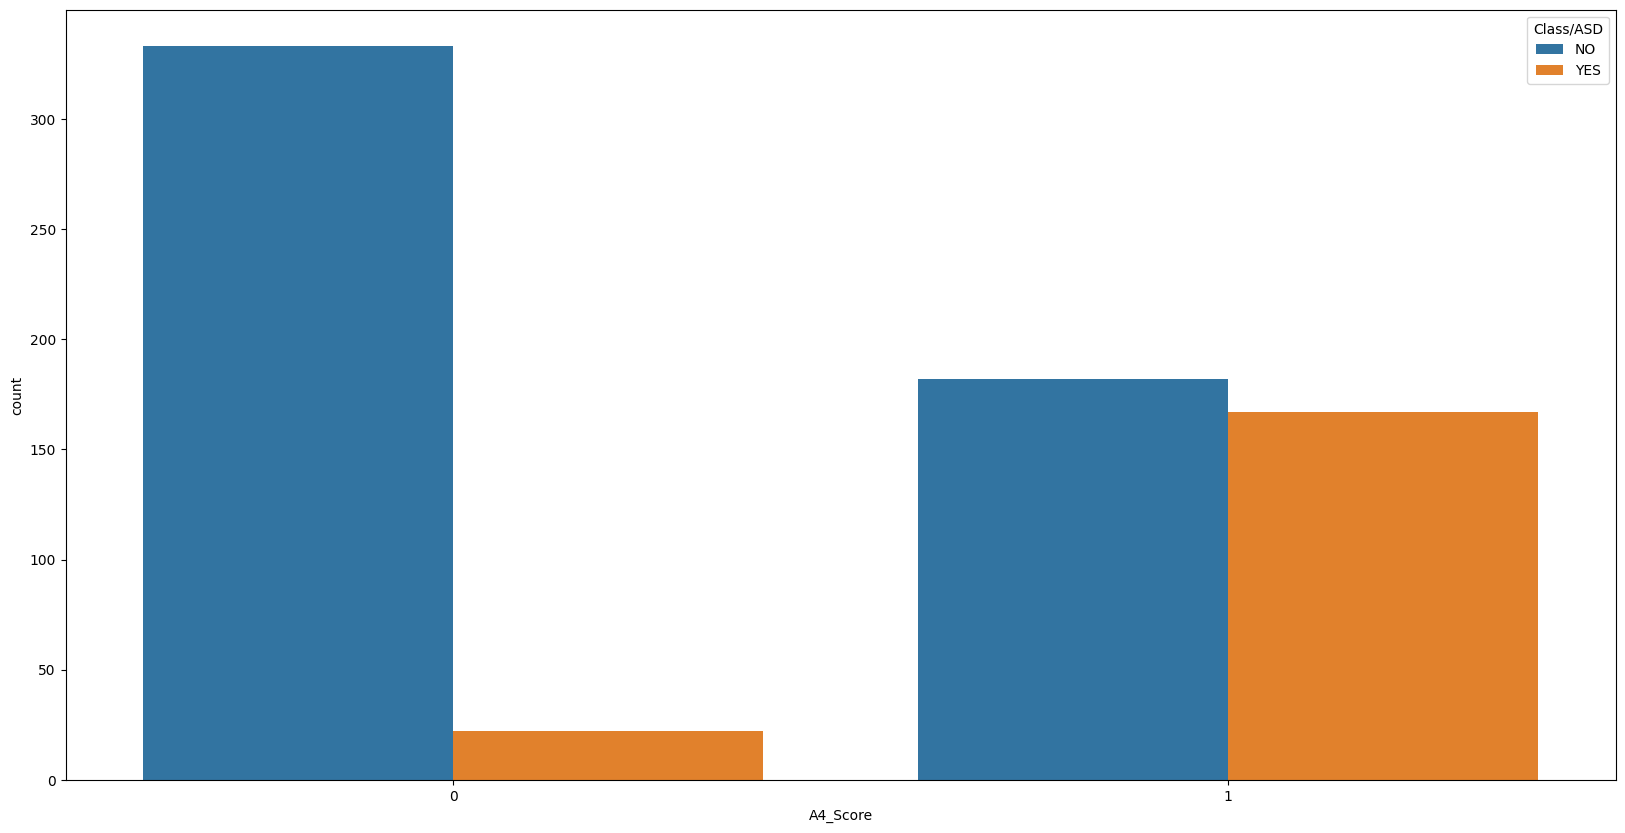

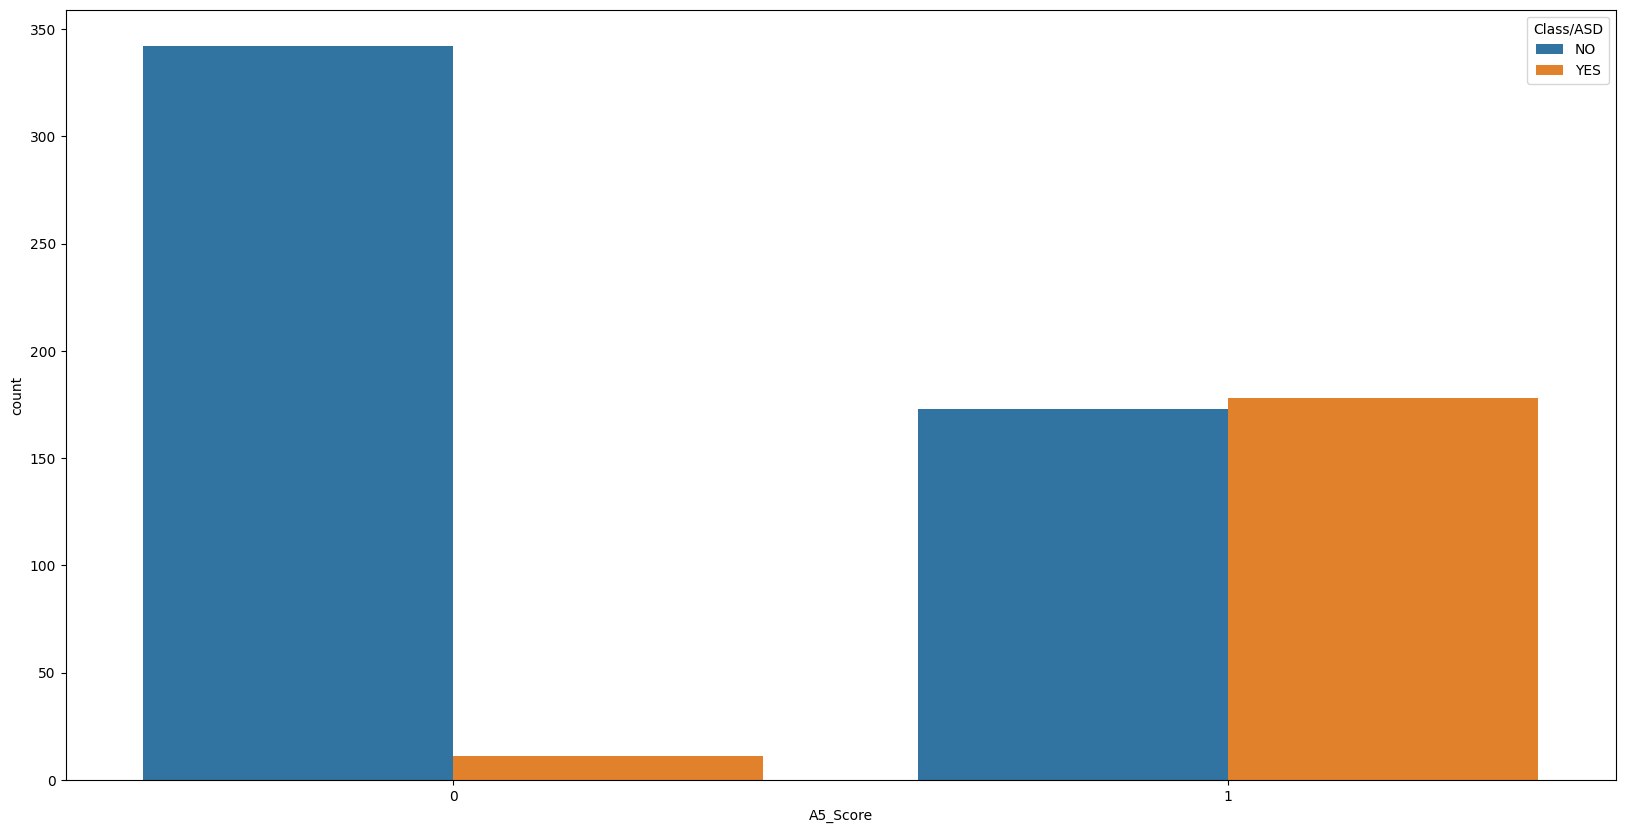

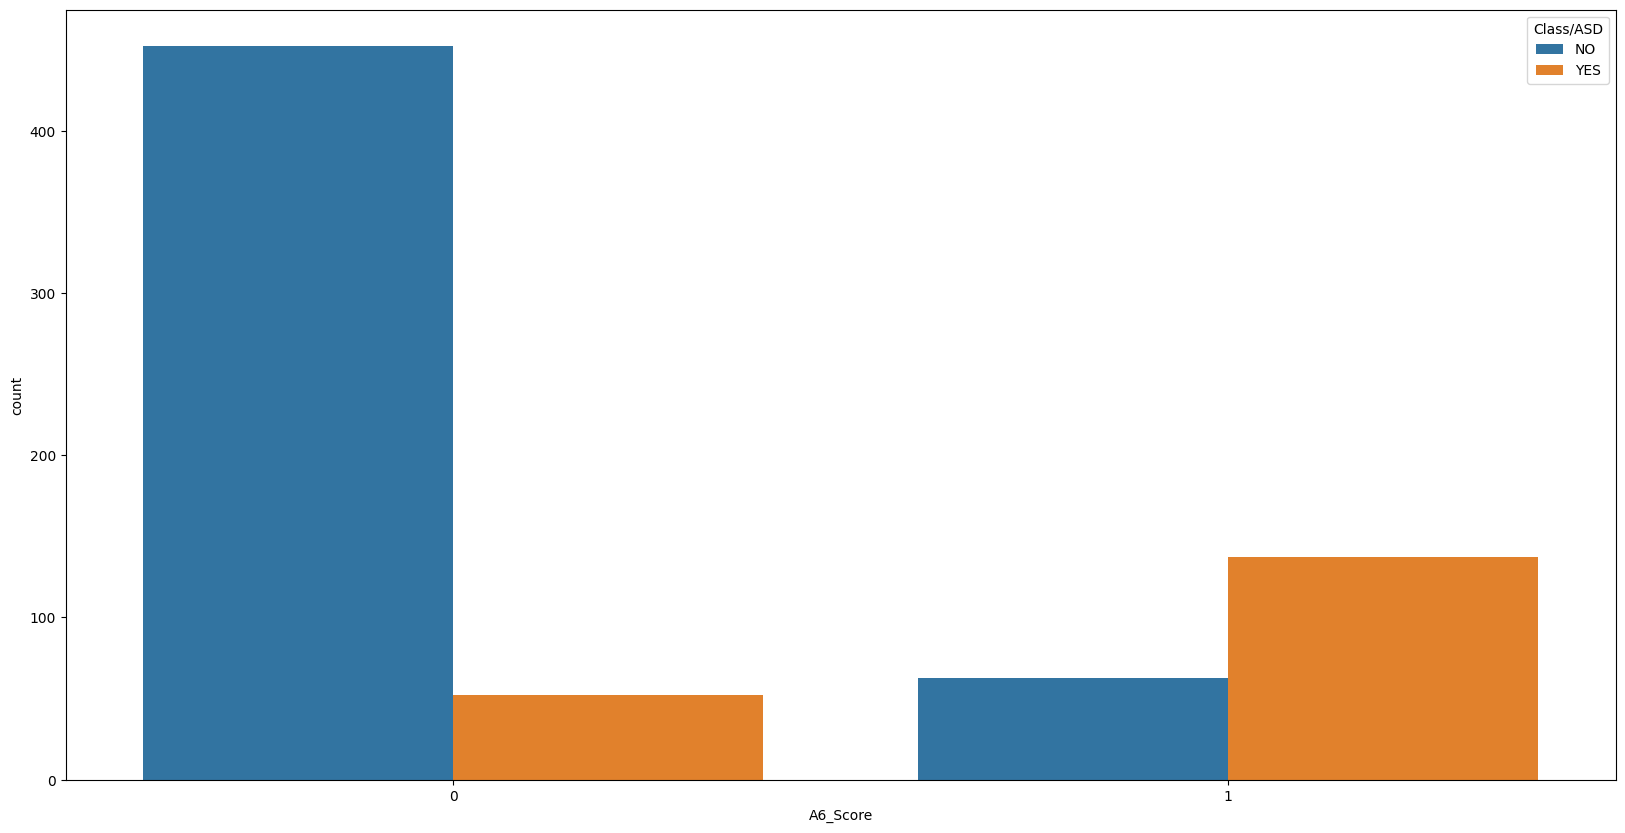

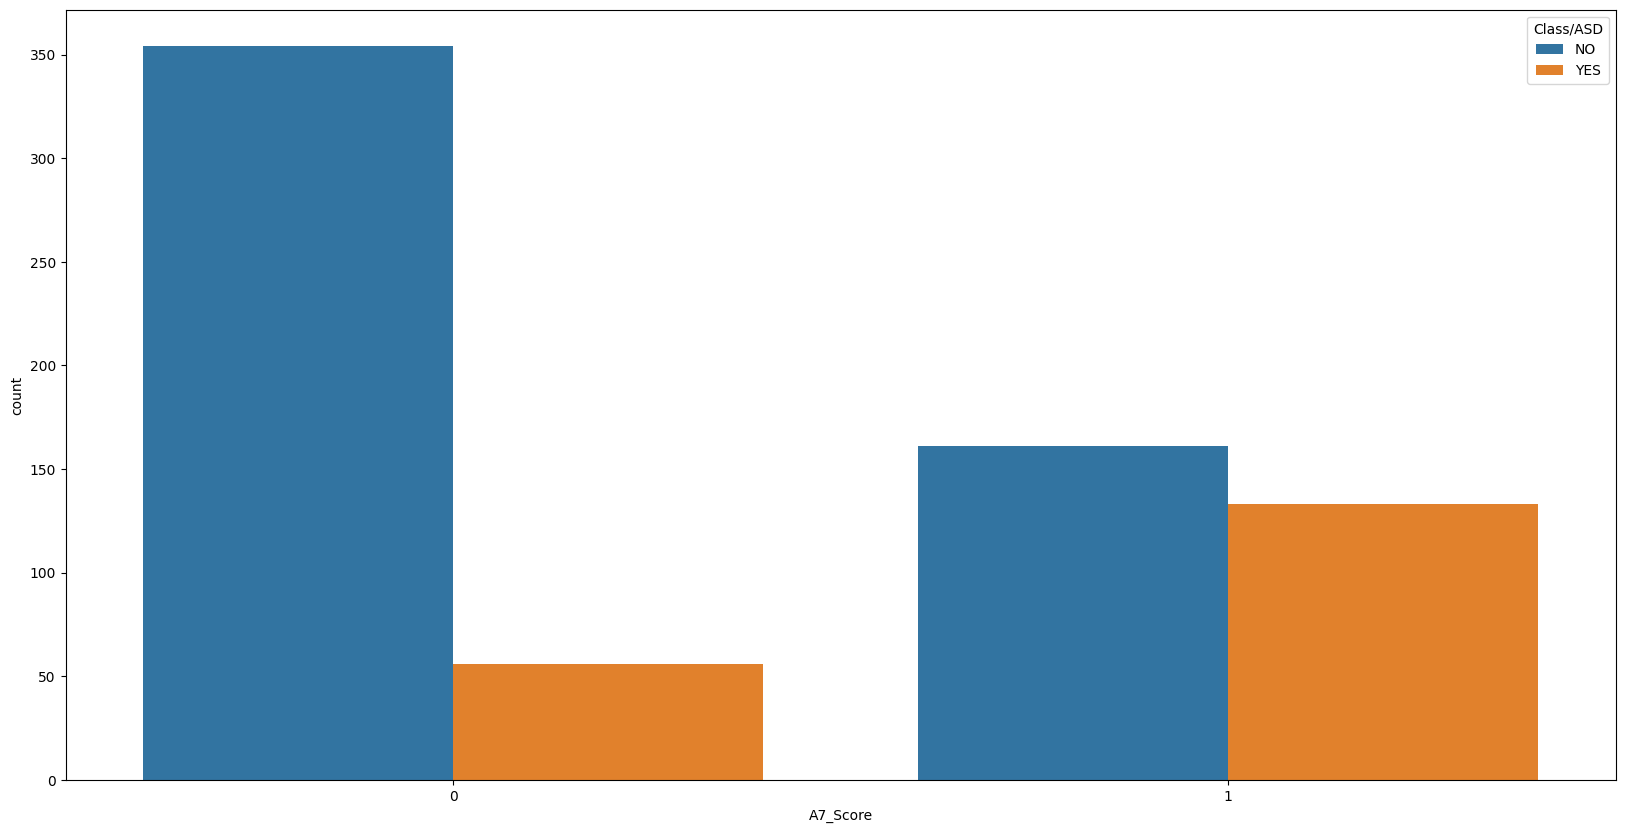

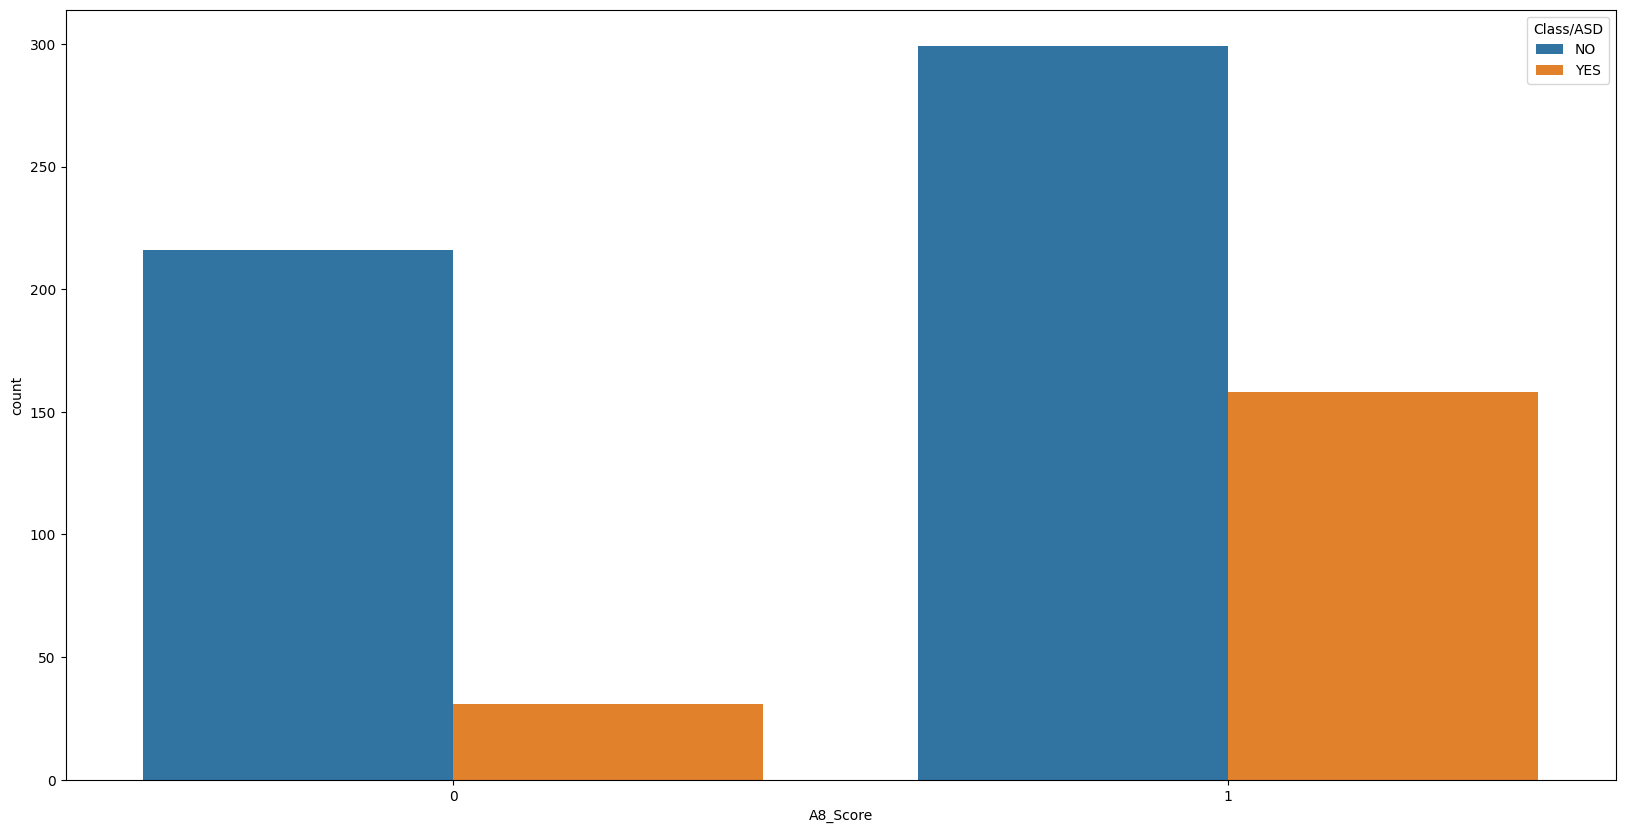

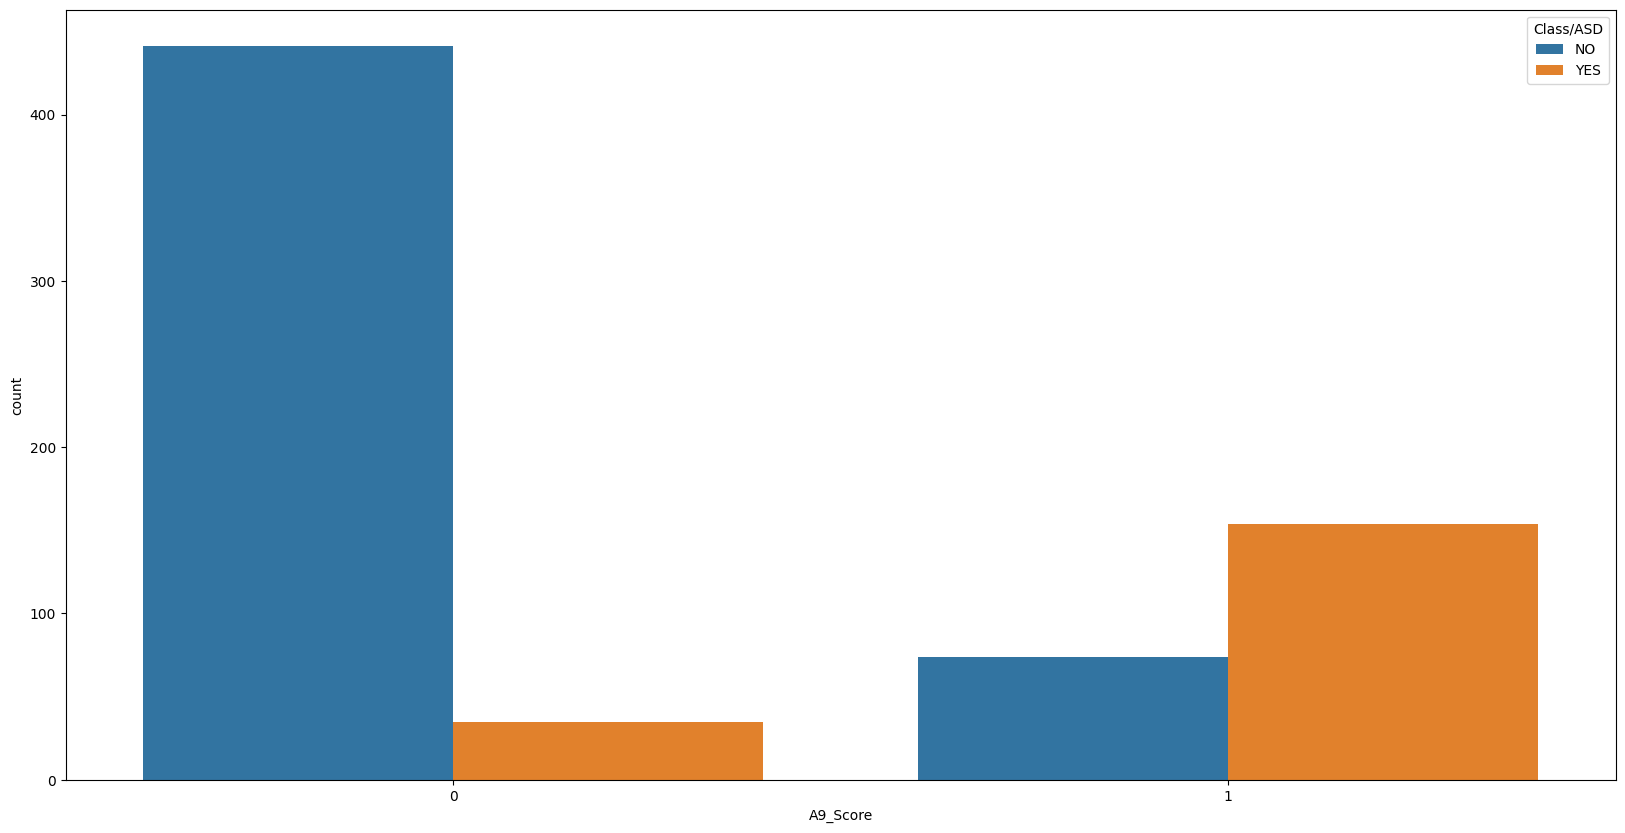

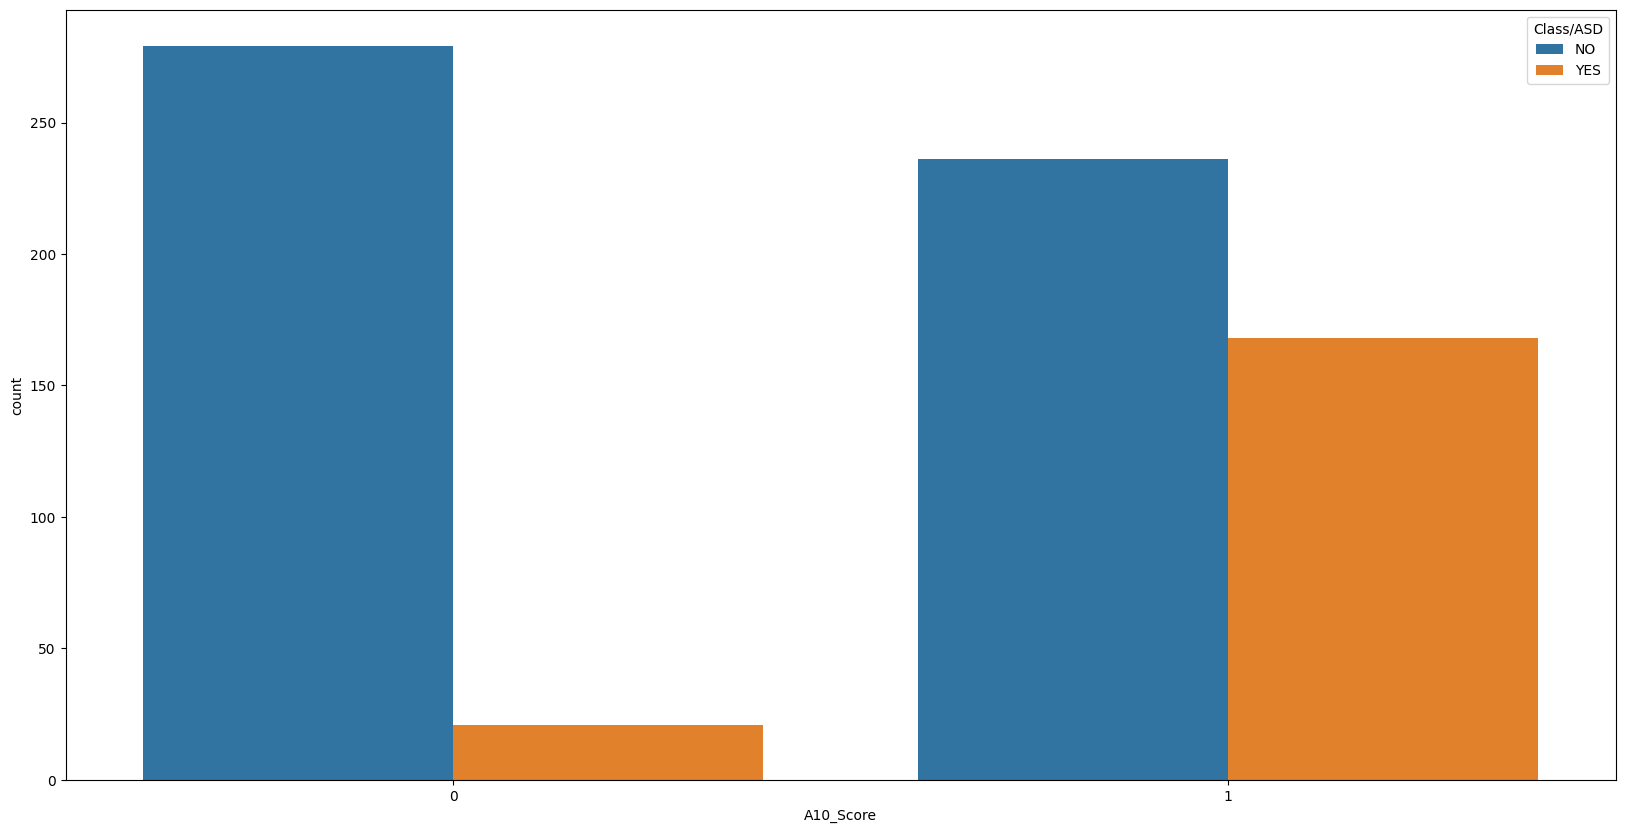

In [135]:
for column in binary_columns:
    plt.figure(figsize=(20,10))
    sns.countplot(x=column, hue='Class/ASD', data=datas)
    plt.show()

- Matrice de correlation

In [136]:
!pip3 install phik


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [137]:
### Matrice de correlation entre les variables categorielles et la variable cible

interval columns not set, guessing: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']


/Users/user/Desktop/M2-DataScale/fouille_de_donnees/TPs/Practical_Work_autisme_data/env/lib/python3.11/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable age_desc for analysis 1. Dropping this column
  warnings.warn(


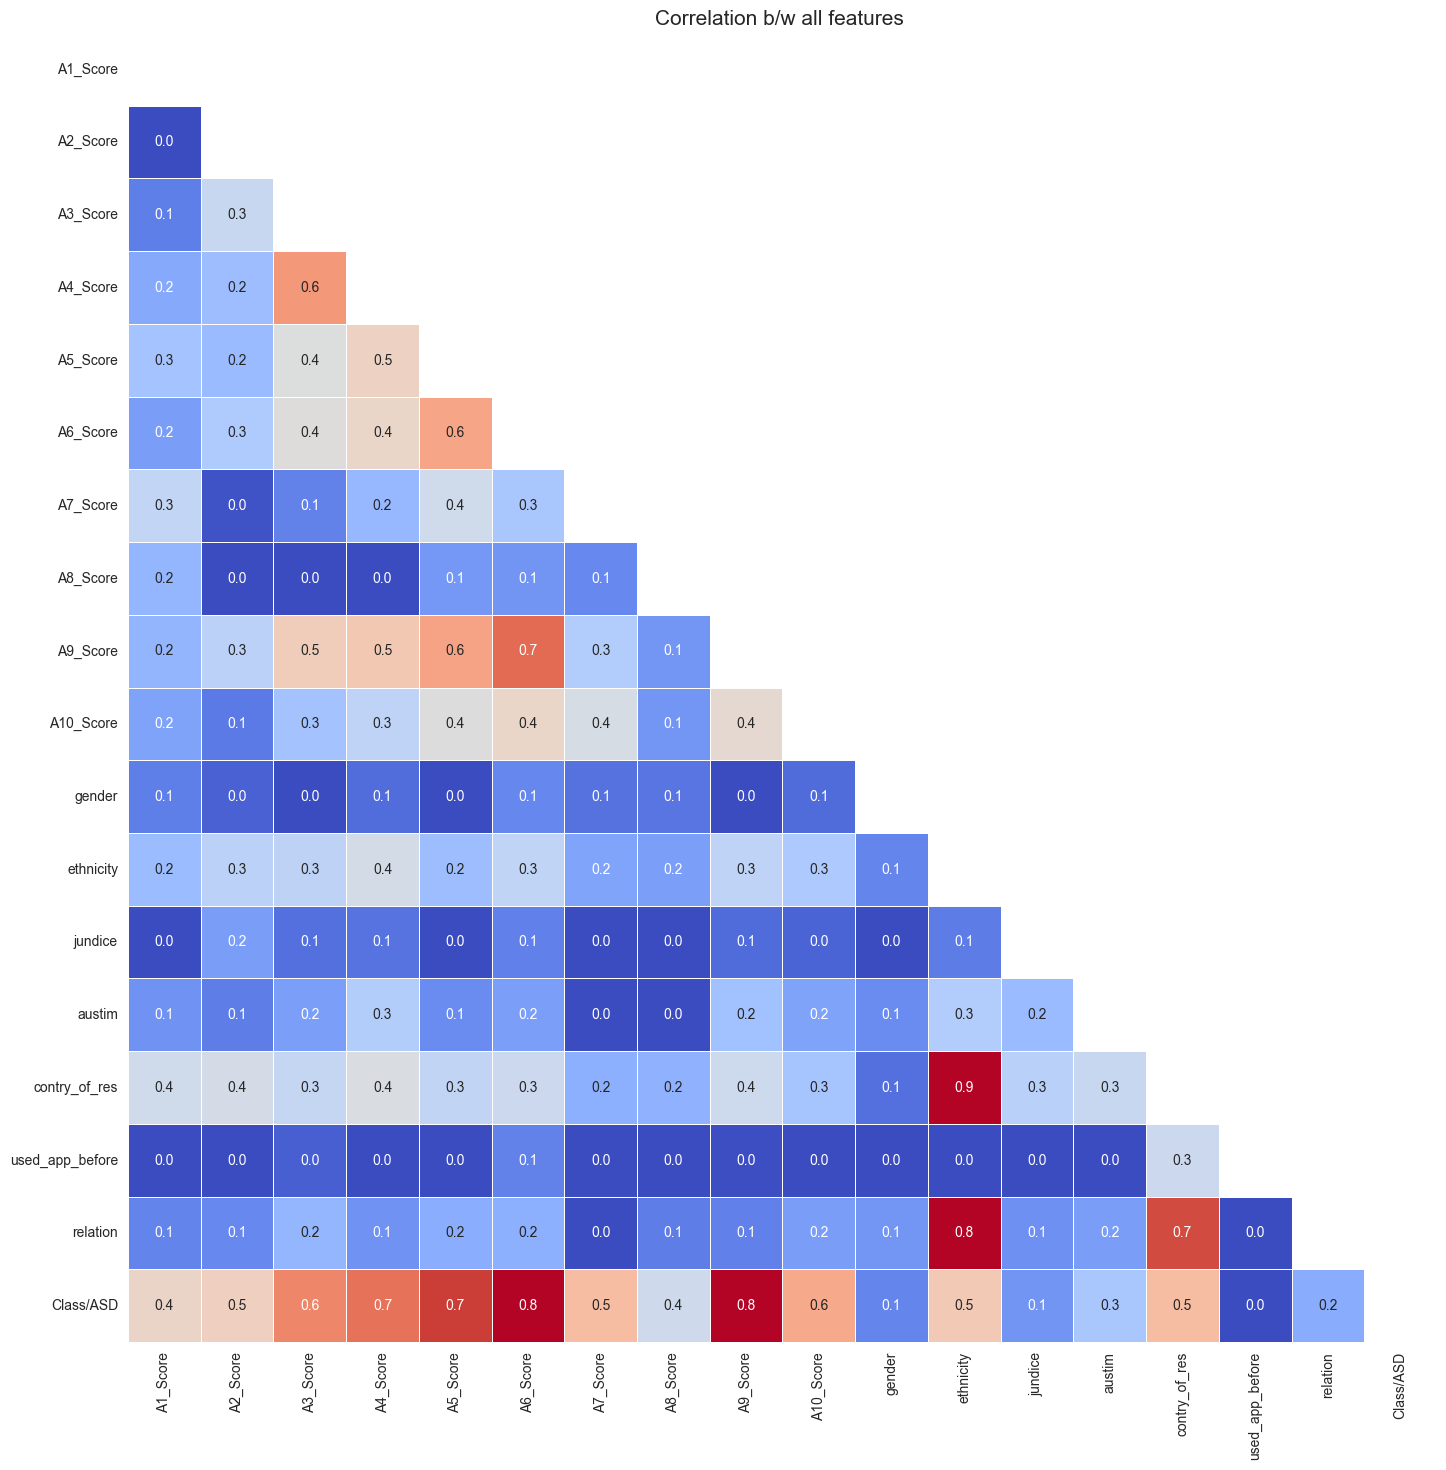

In [138]:
import phik
import numpy as np

Phi_corr = datas.drop(columns=['age', 'result']).phik_matrix()

mask = np.zeros_like(Phi_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  fig, ax = plt.subplots(figsize=(20,17))         
  plot = sns.heatmap(Phi_corr, mask=mask, annot=True, fmt='.1f',linewidths=.5, ax=ax,cmap='coolwarm',robust=True, square=True,cbar=False) #annot=True writes data in rect boxes
  plt.title('Correlation b/w all features ',size = 15)
  plt.show()

## Preprocesing

### Data Cleaning

#### Missing values

In [139]:
datas['ethnicity'].replace('?', np.nan, inplace=True)
datas['relation'].replace('?', np.nan, inplace=True)

In [140]:
datas.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

<Axes: >

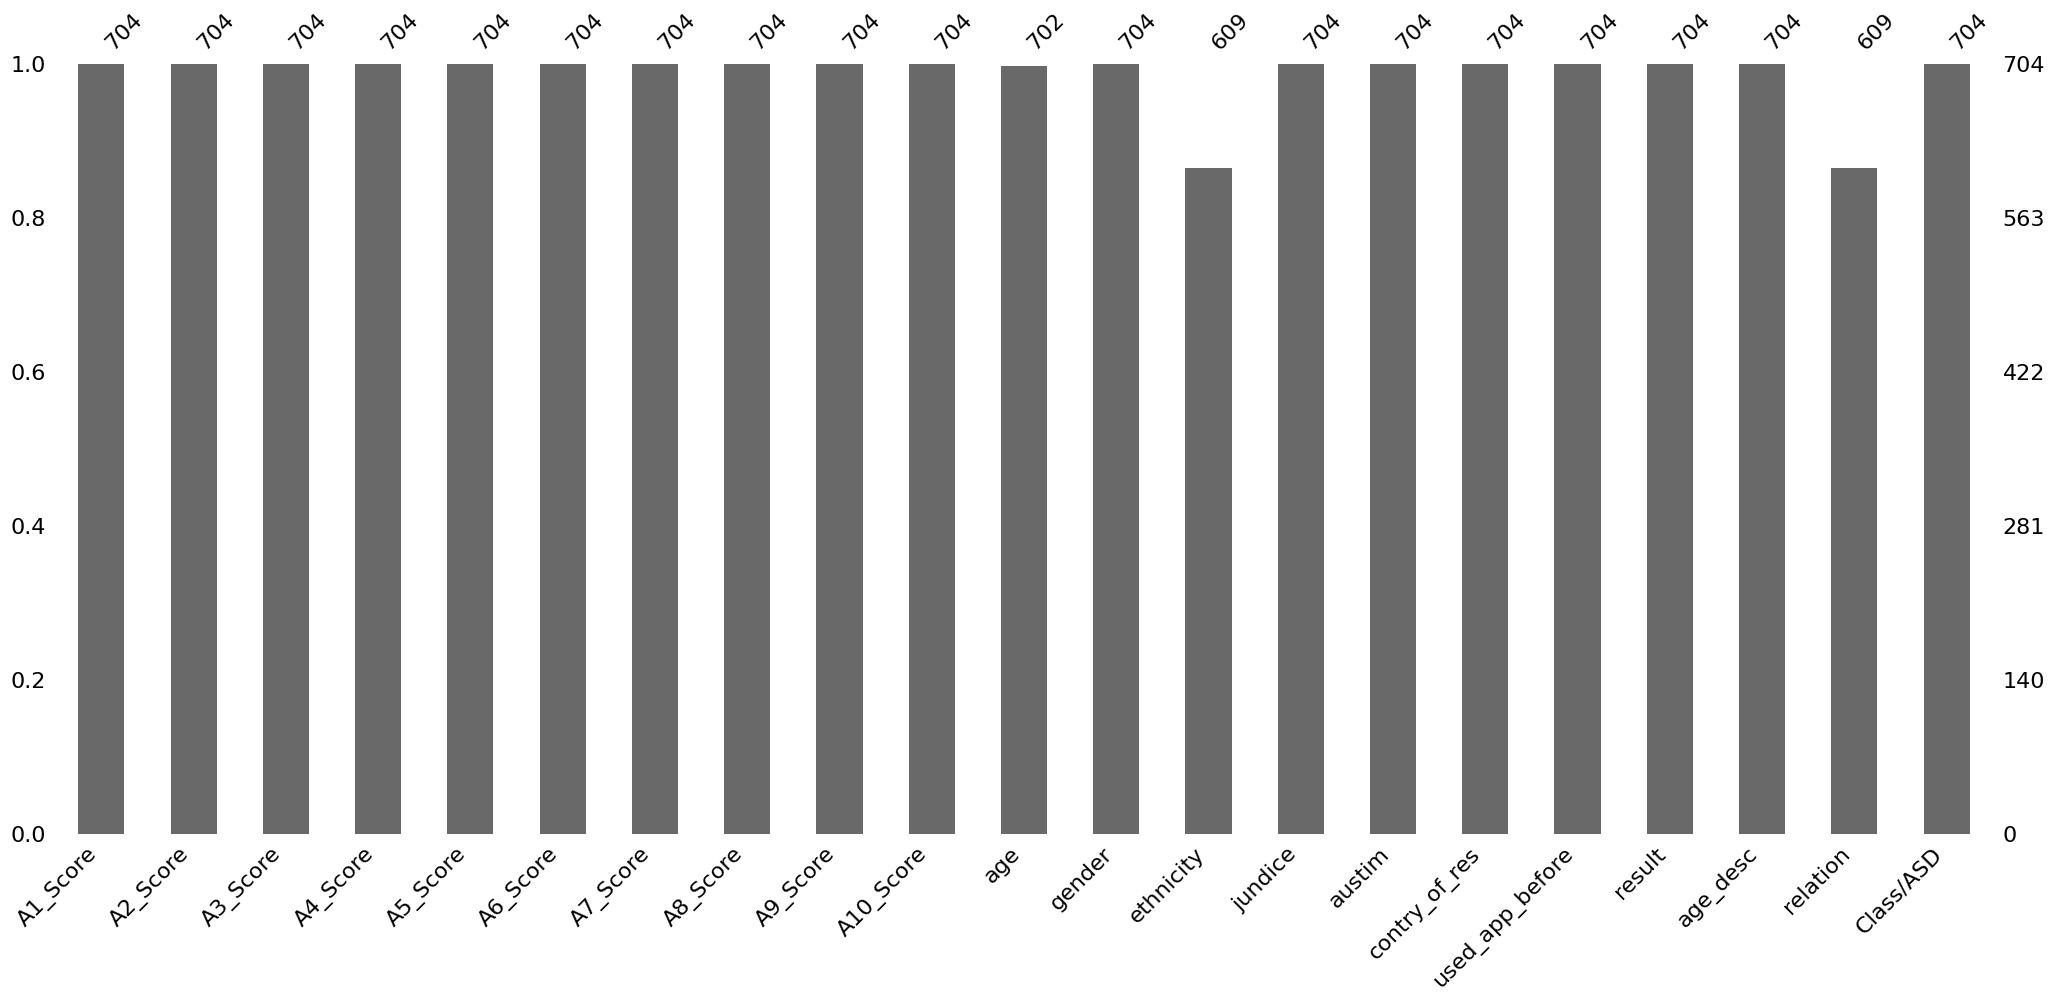

In [141]:
import missingno as msn

msn.bar(datas)

Au vu de nombre petit de valeurs manquantes pour `age`, nous allons supprimer les lignes avec les deux valeurs manquantes

In [142]:
dataset_filtered = datas.dropna(subset=['age'])

Pour les variables `ethnicity` et `relation`, nous allons imputer les valeurs manquantes par la frequence la plus grande

In [143]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputed_data = pd.DataFrame(imputer.fit_transform(dataset_filtered))
imputed_data.columns = dataset_filtered.columns
imputed_data.index = dataset_filtered.index

In [144]:
imputed_data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [145]:
imputed_data["ethnicity"].unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic',
       'Turkish', 'others'], dtype=object)

<Axes: >

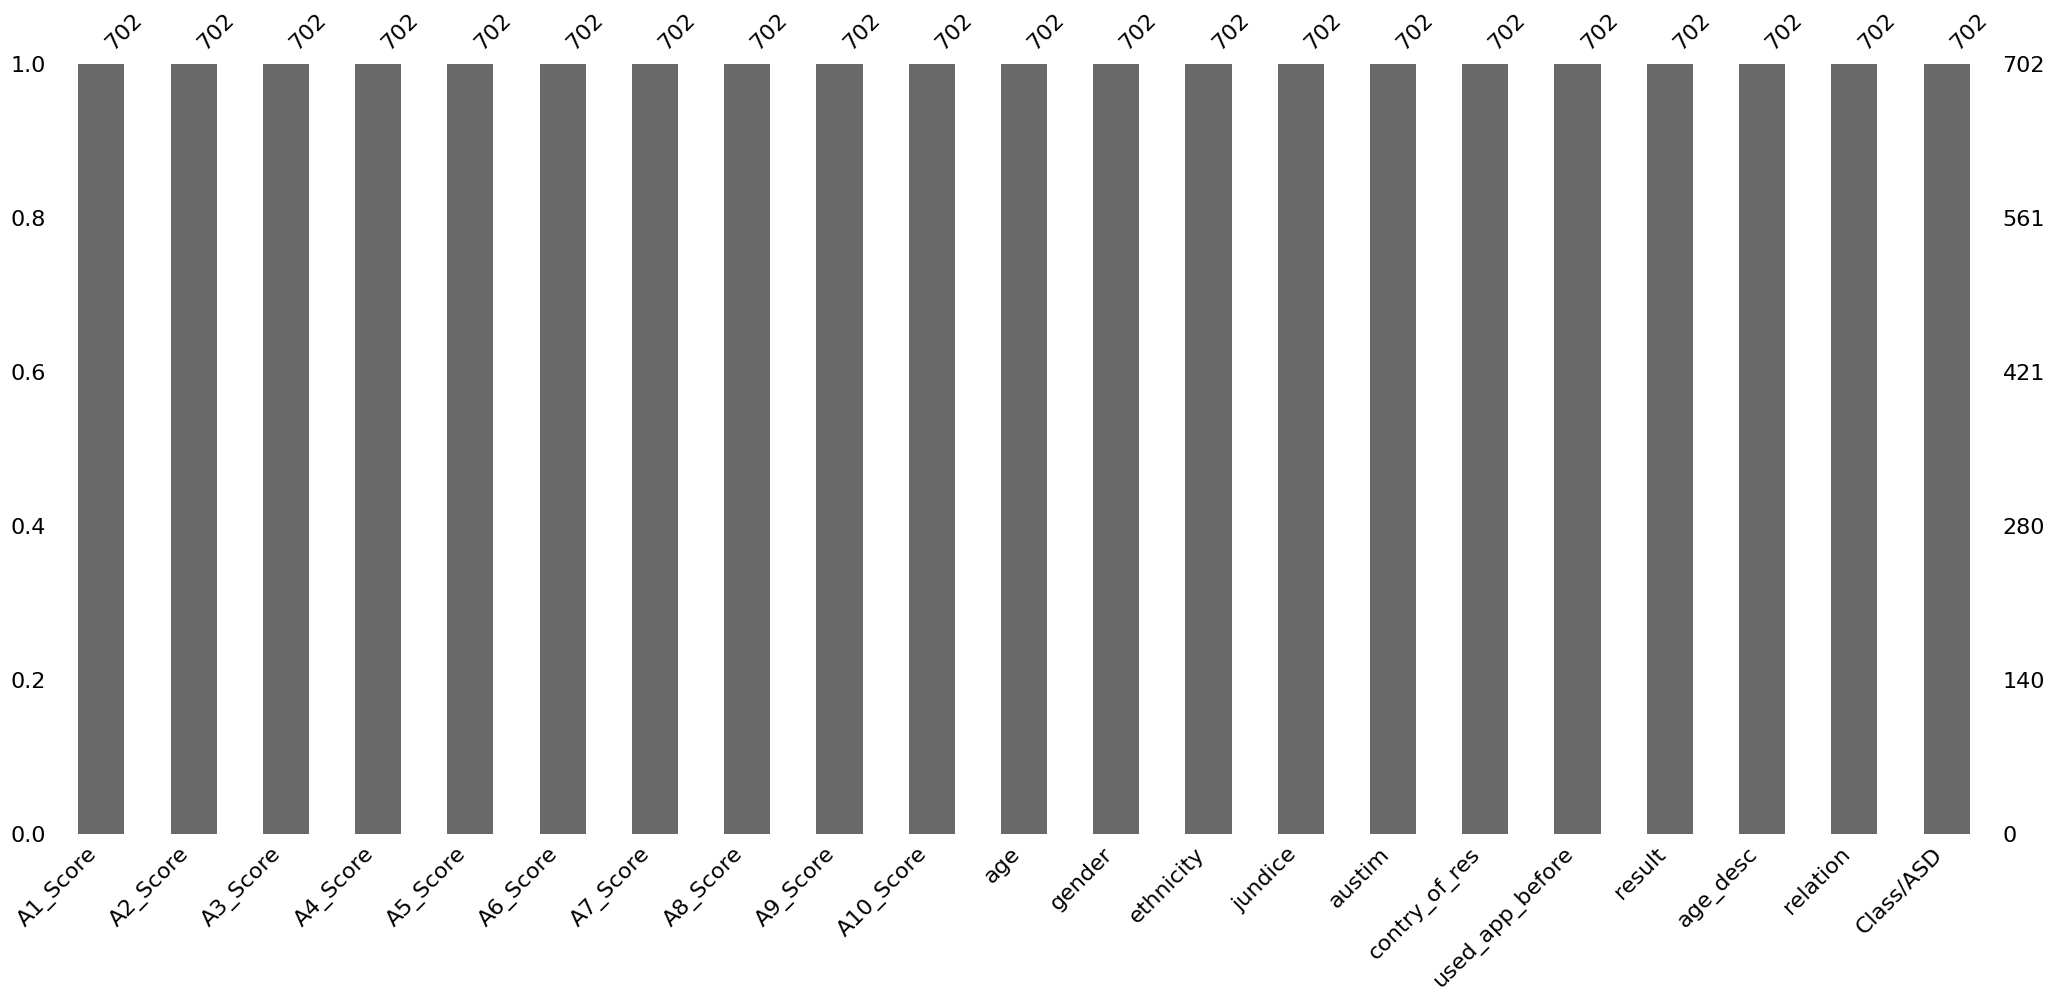

In [146]:
msn.bar(imputed_data)

#### Noisy values

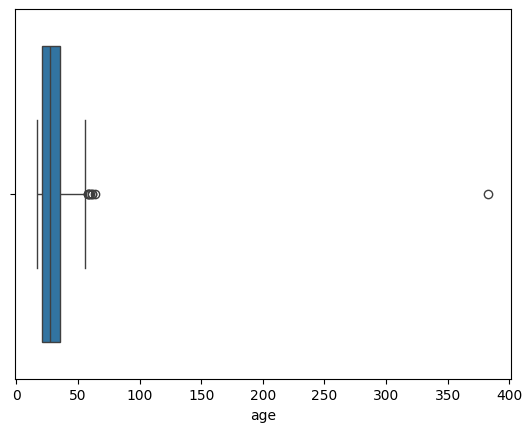

In [147]:
sns.boxplot(x='age', data=dataset_filtered)
plt.show()

Utilisation du Z-Score pour supprimer la valuer abberante sur l'age 

In [148]:
from scipy.stats import zscore

#z_scores = zscore(dataset_filtered['age'])
#dataset_cleaned = dataset_filtered[(z_scores < threshold) & (z_scores > -threshold)]

- Redondance de classe pour `ethnicity`

In [149]:
imputed_data['ethnicity'] = imputed_data['ethnicity'].replace('others','Others')

In [150]:
imputed_data['ethnicity'].unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic',
       'Turkish'], dtype=object)

#### Data Transformation

- Suppression de la colonne `age_desc`

In [151]:
imputed_data.drop(columns=['age_desc'], inplace=True)

In [152]:
imputed_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,White-European,no,no,Egypt,no,2.0,Self,NO


- Encodage des donnees categorielles et booleennes

In [153]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

imputed_data['ethnicity'] = le.fit_transform(imputed_data['ethnicity'])
imputed_data['jundice'] = le.fit_transform(imputed_data['jundice'])
imputed_data['austim'] = le.fit_transform(imputed_data['austim'])
imputed_data['contry_of_res'] = le.fit_transform(imputed_data['contry_of_res'])
imputed_data['relation'] = le.fit_transform(imputed_data['relation'])
imputed_data['used_app_before'] = le.fit_transform(imputed_data['used_app_before'])
imputed_data['gender'] = le.fit_transform(imputed_data['gender'])
imputed_data['Class/ASD'] = le.fit_transform(imputed_data['Class/ASD'])
imputed_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,9,0,0,64,0,6.0,4,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,3,0,1,13,0,5.0,4,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,3,1,1,56,0,8.0,2,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,9,0,1,64,0,6.0,4,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,9,0,0,22,0,2.0,4,0


In [154]:
imputed_data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,9,0,0,64,0,6.0,4,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,3,0,1,13,0,5.0,4,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,3,1,1,56,0,8.0,2,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,9,0,1,64,0,6.0,4,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,9,0,0,22,0,2.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,0,9,0,0,51,0,7.0,4,1
700,1,0,0,0,0,0,0,1,0,1,34.0,1,2,0,0,40,0,3.0,2,0
701,1,0,1,1,1,0,1,1,0,1,24.0,0,9,0,0,51,0,7.0,4,1
702,1,0,0,1,1,0,1,0,1,1,35.0,1,7,0,0,47,0,6.0,4,0


#### Splitting datas 

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(imputed_data.drop(columns=['Class/ASD']), imputed_data['Class/ASD'], test_size=0.3)

In [156]:
X_train

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation
601,1,0,1,0,0,0,0,1,0,0,42.0,0,0,0,0,29,0,3.0,4
560,1,1,1,1,1,1,1,0,1,1,39.0,0,9,0,1,64,0,9.0,4
35,0,0,1,0,0,0,0,0,0,0,55.0,1,9,0,0,43,0,1.0,4
11,0,1,0,1,1,1,1,0,0,1,18.0,0,4,0,0,14,0,6.0,2
381,1,0,0,0,0,0,0,1,0,0,23.0,0,9,0,0,36,0,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,1,1,1,1,1,0,0,0,0,1,46.0,0,0,0,0,48,0,6.0,4
301,1,1,1,1,1,1,1,1,1,1,33.0,0,9,1,0,63,0,10.0,4
382,1,1,1,1,1,0,1,0,1,1,21.0,0,9,0,0,36,0,8.0,4
460,0,0,0,1,0,0,0,0,0,0,52.0,0,9,0,0,63,0,1.0,4


In [157]:
y_train

601    0
560    1
35     0
11     0
381    0
      ..
697    0
301    1
382    1
460    0
493    1
Name: Class/ASD, Length: 491, dtype: int64

In [158]:
X_test

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation
285,0,0,0,1,1,1,1,0,1,1,32.0,0,9,0,0,27,0,6.0,4
152,1,1,0,0,1,0,0,0,0,1,32.0,0,7,0,0,43,0,4.0,4
123,1,0,0,1,1,1,1,1,0,1,30.0,1,0,1,0,54,0,7.0,4
404,0,1,0,1,1,0,0,0,0,0,19.0,0,4,0,0,62,0,3.0,4
454,1,1,0,0,0,0,1,0,0,0,17.0,0,1,0,0,62,0,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0,0,1,0,1,0,1,0,1,1,30.0,1,0,0,0,57,0,5.0,4
24,1,1,1,1,0,0,0,1,0,0,43.0,1,9,0,0,38,0,5.0,4
622,1,0,0,0,1,0,1,1,0,0,22.0,0,0,0,0,43,0,4.0,4
80,0,0,1,1,0,0,1,1,0,1,32.0,1,9,1,1,0,0,5.0,4


In [159]:
y_test

285    0
152    0
123    1
404    0
454    0
      ..
153    0
24     0
622    0
80     0
627    0
Name: Class/ASD, Length: 211, dtype: int64

Model de Classification 2: KNN 

In [191]:
scores_list = []

for n in range(1, 21):
    knn = neighbors.KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    scores_list.append(knn.score(X_test, y_test))
    
y_pred = knn.predict(X_test)

In [192]:
# Create Dataframe for the KNN Scores and its Accuracy  
knn_df = pd.DataFrame({'Valeurs de k' : range(1, 21), 'Accuracy' :  scores_list})
knn_df.head(20)

,Valeurs de k,Accuracy
0,1,0.876777
1,2,0.881517
2,3,0.872038
3,4,0.886256
4,5,0.890995
5,6,0.872038
6,7,0.876777
7,8,0.881517
8,9,0.876777
9,10,0.862559


In [193]:
knn5 = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train, y_train)  
y_pred = knn5.predict(X_test)
print('KNN Score:', knn5.score(X_test, y_test))

KNN Score: 0.8909952606635071


In [195]:
print(metrics.classification_report(y_test, y_pred, target_names = ['No Autism', 'Autism'])) 
cv_score = cross_val_score(knn5, imputed_data.drop(columns=['Class/ASD']), imputed_data['Class/ASD'], cv = 10)
print('CV Score :', '{0:.4}'.format(cv_score.mean())) 
print('ROC AUC Score : ','{0:.2%}'.format(roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

   No Autism       0.91      0.95      0.93       164
      Autism       0.80      0.68      0.74        47

    accuracy                           0.89       211
   macro avg       0.86      0.82      0.83       211
weighted avg       0.89      0.89      0.89       211

CV Score : 0.9103
ROC AUC Score :  81.60%


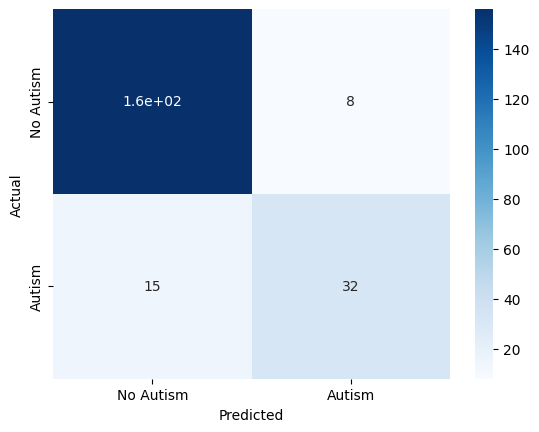

In [196]:
cm = metrics.confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True, cmap = 'Blues') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax.set_xticklabels(['No Autism', 'Autism'])
ax.set_yticklabels(['No Autism', 'Autism'], rotation = 90, va = 'center')
plt.show()